In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [3]:
data= pd.read_csv('Train.csv')
test= pd.read_csv('Test.csv')
data.drop('Employee_ID',axis=1,inplace=True)
test.drop('Employee_ID',axis=1,inplace=True)
data.head(10)

Gender   Age  Education_Level Relationship_Status     Hometown  \
0      F  42.0                4             Married     Franklin   
1      M  24.0                3              Single  Springfield   
2      F  58.0                3             Married      Clinton   
3      F  26.0                3              Single      Lebanon   
4      F  31.0                1             Married  Springfield   
5      M  54.0                3             Married      Lebanon   
6      F  21.0                4             Married  Springfield   
7      F   NaN                3             Married  Springfield   
8      M  40.0                4              Single  Springfield   
9      M  45.0                3             Married      Lebanon   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   
5                 Purchasing             Conceptual             19.0   
6                 Purchasing              Directive              2.0   
7                      Sales              Directive             34.0   
8                 Production             Analytical             13.0   
9                         IT              Directive             21.0   

   Time_since_promotion  growth_rate  ...  Compensation_and_Benefits  \
0                     4           33  ...                      type2   
1                     4           36  ...                      type2   
2                     3           51  ...                      type2   
3                     3           56  ...                      type2   
4                     4           62  ...                      type3   
5                     1           21  ...                      type2   
6                     1           50  ...                      type2   
7                     4           23  ...                      type3   
8                     1           49  ...                      type0   
9                     4           34  ...                      type3   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                3.0     4  0.7516  1.8688   2.0     4     5     3   
1                4.0     3 -0.9612 -0.4537   2.0     3     5     3   
2                1.0     4 -0.9612 -0.4537   3.0     3     8     3   
3                1.0     3 -1.8176 -0.4537   NaN     3     7     3   
4                3.0     1  0.7516 -0.4537   2.0     2     8     2   
5                1.0     3 -1.8176  1.8688   2.0     2     8     3   
6                2.0     3 -0.9612  0.7075   2.0     3     7     3   
7                2.0     3 -0.1048 -0.4537   2.0     3     9     3   
8                4.0     1     NaN  1.8688   2.0     5     6     3   
9                4.0     3  0.7516 -0.4537   2.0     4     8     3   

   Attrition_rate  
0          0.1841  
1          0.0670  
2          0.0851  
3          0.0668  
4          0.1827  
5          0.7613  
6          0.2819  
7          0.1169  
8          0.1968  
9          0.2870  

[10 rows x 23 columns]

__General Analysis__

In [4]:
data.isnull().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [5]:
test.isnull().sum()

Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [6]:
data.describe()

Age  Education_Level  Time_of_service  Time_since_promotion  \
count  6588.000000      7000.000000      6856.000000           7000.000000   
mean     39.622799         3.187857        13.385064              2.367143   
std      13.606920         1.065102        10.364188              1.149395   
min      19.000000         1.000000         0.000000              0.000000   
25%      27.000000         3.000000         5.000000              1.000000   
50%      37.000000         3.000000        10.000000              2.000000   
75%      52.000000         4.000000        21.000000              3.000000   
max      65.000000         5.000000        43.000000              4.000000   

       growth_rate  Travel_Rate   Post_Level    Pay_Scale  Work_Life_balance  \
count  7000.000000  7000.000000  7000.000000  6991.000000        6989.000000   
mean     47.064286     0.817857     2.798000     6.006294           2.387895   
std      15.761406     0.648205     1.163721     2.058435           1.122786   
min      20.000000     0.000000     1.000000     1.000000           1.000000   
25%      33.000000     0.000000     2.000000     5.000000           1.000000   
50%      47.000000     1.000000     3.000000     6.000000           2.000000   
75%      61.000000     1.000000     3.000000     8.000000           3.000000   
max      74.000000     2.000000     5.000000    10.000000           5.000000   

              VAR1         VAR2         VAR3         VAR4         VAR5  \
count  7000.000000  6423.000000  7000.000000  6344.000000  7000.000000   
mean      3.098571    -0.008126    -0.013606     1.891078     2.834143   
std       0.836377     0.989850     0.986933     0.529403     0.938945   
min       1.000000    -1.817600    -2.776200     1.000000     1.000000   
25%       3.000000    -0.961200    -0.453700     2.000000     2.000000   
50%       3.000000    -0.104800    -0.453700     2.000000     3.000000   
75%       3.000000     0.751600     0.707500     2.000000     3.000000   
max       5.000000     1.608100     1.868800     3.000000     5.000000   

              VAR6         VAR7  Attrition_rate  
count  7000.000000  7000.000000     7000.000000  
mean      7.101286     3.257000        0.189376  
std       1.164262     0.925319        0.185753  
min       5.000000     1.000000        0.000000  
25%       6.000000     3.000000        0.070400  
50%       7.000000     3.000000        0.142650  
75%       8.000000     4.000000        0.235000  
max       9.000000     5.000000        0.995900

In [7]:
categorical=[ i for i in data.columns if data[i].dtype=='O']
categorical

['Gender',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Compensation_and_Benefits']

In [8]:
numerical=[ i for i in data.columns if data[i].dtype !='O']
numerical

['Age',
 'Education_Level',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'Attrition_rate']

In [9]:
continuous=[ i for i in numerical if data[i].nunique()>25]
discrete = [i for i in numerical if i not in continuous]

In [10]:
print('Discrete: ' ,discrete,'\n','Continuous: ', continuous)



Discrete:  ['Education_Level', 'Time_since_promotion', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'] 
 Continuous:  ['Age', 'Time_of_service', 'growth_rate', 'Attrition_rate']


In [11]:
def list_hist(list,height):
    for i in range(0,len(list)):
        perc = pd.Series(data[list[i]].value_counts() / len(data))
        plt.figure(figsize=(6, height))
        plt.subplot(len(list),1,i+1)
        perc.plot.bar()
        plt.axhline(y=0.05, color='red')
        plt.title(list[i])

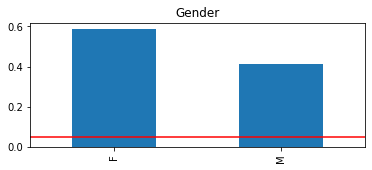

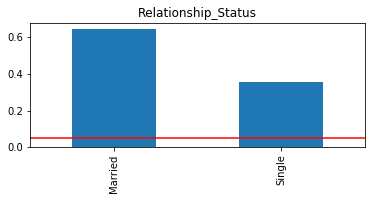

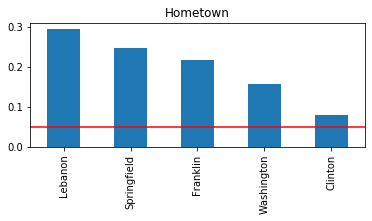

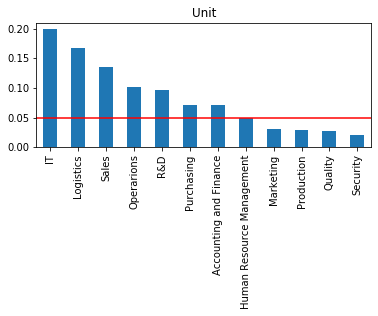

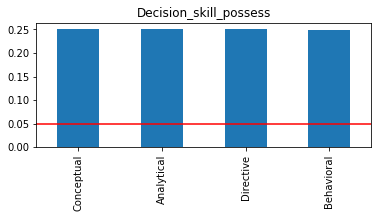

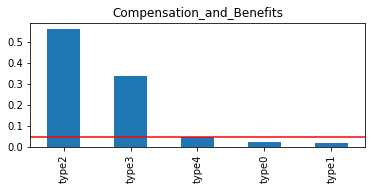

In [12]:
list_hist(categorical,16)

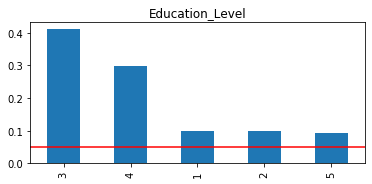

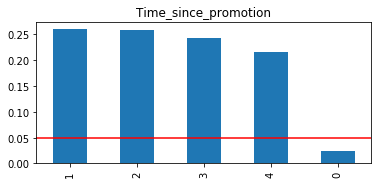

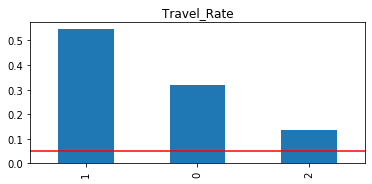

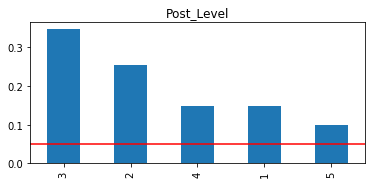

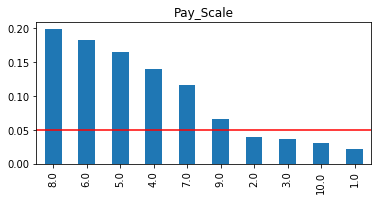

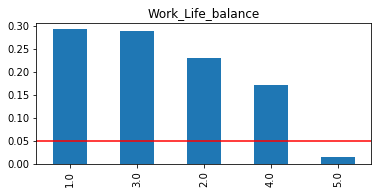

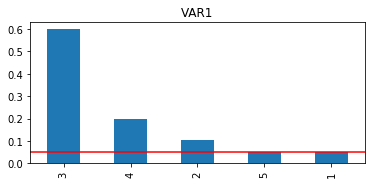

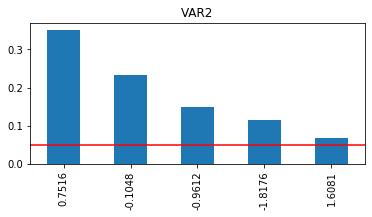

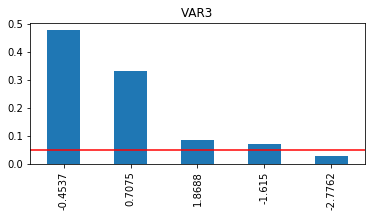

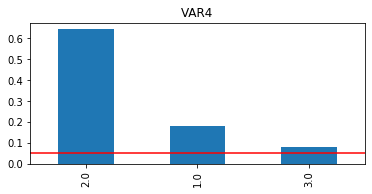

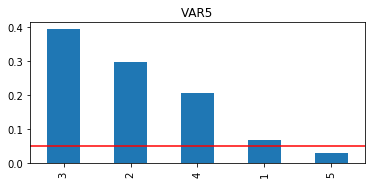

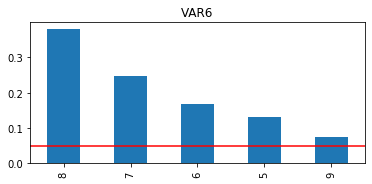

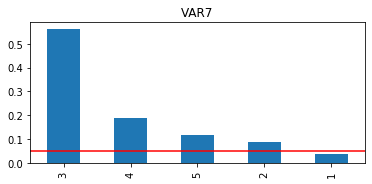

In [13]:
list_hist(discrete,40)

In [14]:
len(data[data['Attrition_rate']>.5])/len(data)

0.082

__EDA__

__AGE__
1) 39 s km umr k jada job chorte h. 
2) Use a ml model to impute age using appropriate features  as above in graph.
3) transformation failed.
4) Do feature scaling
5) edu level with 3 & 4 is much common than others and also have left jobs more.
6) 5% Married people  n job chordi or 3% single n chordi.
7) It logisctics sales sbse jada jobs chordte h.
8) type 2 or type 3 benefits walo rate jada.
9) jitn jada time company  m utni hi  km   chordne ki freq.
10) More Age specific can be derieved from starting graphs.
11) peopl in Lebanon and spring field have very high rates'Distribution of {} when rate is high'
12)people with post 3 have high rates
13) people with payscale 6 4 5 8 have high rate
14) 25% ppl with work lyf bal 3 have left the job.
15) var1=3 var2=.75 var3= -.4 var5 =3 var6=8 var 7=3 have very high rates. 

In [15]:
data.head()

Gender   Age  Education_Level Relationship_Status     Hometown  \
0      F  42.0                4             Married     Franklin   
1      M  24.0                3              Single  Springfield   
2      F  58.0                3             Married      Clinton   
3      F  26.0                3              Single      Lebanon   
4      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  ...  Compensation_and_Benefits  \
0                     4           33  ...                      type2   
1                     4           36  ...                      type2   
2                     3           51  ...                      type2   
3                     3           56  ...                      type2   
4                     4           62  ...                      type3   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                3.0     4  0.7516  1.8688   2.0     4     5     3   
1                4.0     3 -0.9612 -0.4537   2.0     3     5     3   
2                1.0     4 -0.9612 -0.4537   3.0     3     8     3   
3                1.0     3 -1.8176 -0.4537   NaN     3     7     3   
4                3.0     1  0.7516 -0.4537   2.0     2     8     2   

   Attrition_rate  
0          0.1841  
1          0.0670  
2          0.0851  
3          0.0668  
4          0.1827  

[5 rows x 23 columns]

In [16]:
data.Age.isnull().sum()

412

In [17]:
categorical,discrete

(['Gender',
  'Relationship_Status',
  'Hometown',
  'Unit',
  'Decision_skill_possess',
  'Compensation_and_Benefits'],
 ['Education_Level',
  'Time_since_promotion',
  'Travel_Rate',
  'Post_Level',
  'Pay_Scale',
  'Work_Life_balance',
  'VAR1',
  'VAR2',
  'VAR3',
  'VAR4',
  'VAR5',
  'VAR6',
  'VAR7'])

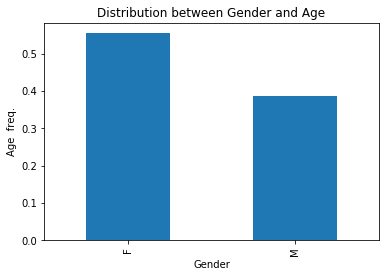

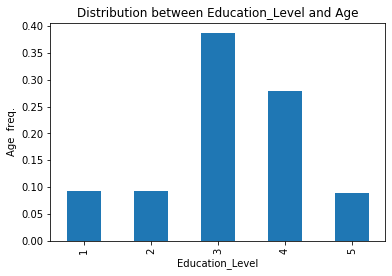

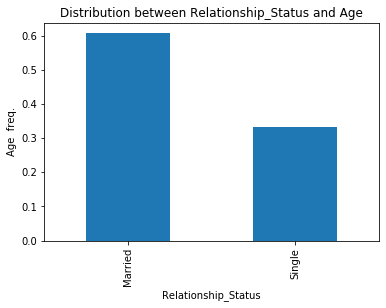

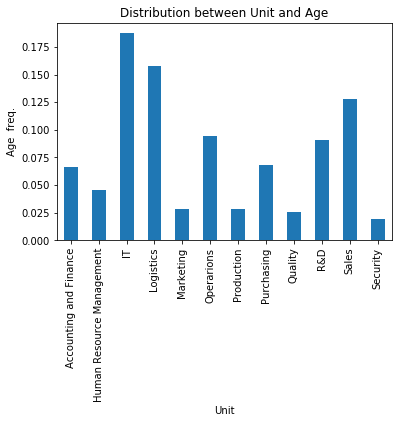

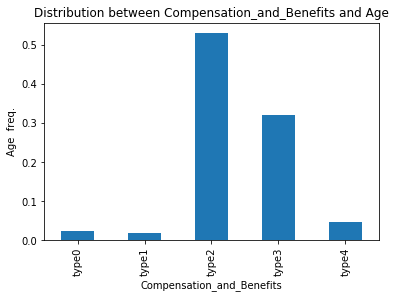

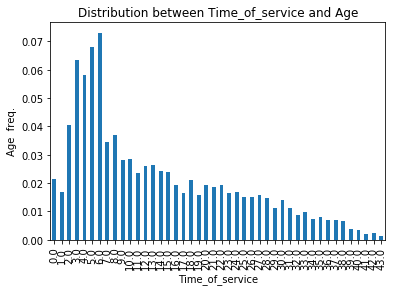

In [18]:
for var in ['Gender', 'Education_Level', 'Relationship_Status','Unit','Compensation_and_Benefits','Time_of_service']:
    
    fig = plt.figure()
    temp = data.groupby([var])['Age'].count()/len(data)
    fig = temp.plot.bar()
    fig.set_title('Distribution between {} and Age'.format(var))
    fig.set_ylabel('Age  freq.')
    plt.show()
    


In [19]:
data.corr()

Age  Education_Level  Time_of_service  \
Age                   1.000000        -0.005770         0.918853   
Education_Level      -0.005770         1.000000        -0.012793   
Time_of_service       0.918853        -0.012793         1.000000   
Time_since_promotion  0.145760        -0.002077         0.137014   
growth_rate           0.001270         0.002991        -0.003486   
Travel_Rate           0.012266        -0.017690         0.004843   
Post_Level            0.002440         0.009986        -0.002286   
Pay_Scale             0.012966         0.006834         0.020347   
Work_Life_balance     0.003073        -0.015262        -0.002557   
VAR1                  0.005696        -0.002185         0.004757   
VAR2                  0.005406        -0.010312         0.003858   
VAR3                  0.007569        -0.009689         0.006863   
VAR4                  0.001803         0.004500        -0.006024   
VAR5                  0.000015         0.005444         0.003194   
VAR6                 -0.000832         0.009195         0.007618   
VAR7                  0.008746         0.012909         0.007034   
Attrition_rate       -0.015498        -0.008143        -0.016447   

                      Time_since_promotion  growth_rate  Travel_Rate  \
Age                               0.145760     0.001270     0.012266   
Education_Level                  -0.002077     0.002991    -0.017690   
Time_of_service                   0.137014    -0.003486     0.004843   
Time_since_promotion              1.000000     0.014147    -0.012061   
growth_rate                       0.014147     1.000000     0.008460   
Travel_Rate                      -0.012061     0.008460     1.000000   
Post_Level                       -0.008851    -0.006887     0.021299   
Pay_Scale                        -0.008901    -0.004145    -0.011689   
Work_Life_balance                -0.007423    -0.018324     0.004132   
VAR1                             -0.002873     0.001351     0.023898   
VAR2                              0.004211     0.010883     0.008374   
VAR3                             -0.002783     0.010991    -0.009019   
VAR4                             -0.003724     0.021336    -0.005933   
VAR5                              0.000563    -0.015122    -0.003866   
VAR6                              0.017264    -0.005860    -0.012280   
VAR7                              0.005173    -0.017993    -0.006271   
Attrition_rate                    0.013880     0.014247    -0.012608   

                      Post_Level  Pay_Scale  Work_Life_balance      VAR1  \
Age                     0.002440   0.012966           0.003073  0.005696   
Education_Level         0.009986   0.006834          -0.015262 -0.002185   
Time_of_service        -0.002286   0.020347          -0.002557  0.004757   
Time_since_promotion   -0.008851  -0.008901          -0.007423 -0.002873   
growth_rate            -0.006887  -0.004145          -0.018324  0.001351   
Travel_Rate             0.021299  -0.011689           0.004132  0.023898   
Post_Level              1.000000   0.022389          -0.014473 -0.008458   
Pay_Scale               0.022389   1.000000          -0.022742  0.011354   
Work_Life_balance      -0.014473  -0.022742           1.000000 -0.022030   
VAR1                   -0.008458   0.011354          -0.022030  1.000000   
VAR2                   -0.007043   0.006296          -0.001492  0.002260   
VAR3                    0.010387   0.003380           0.004476 -0.003318   
VAR4                   -0.012778  -0.010286          -0.026753  0.002112   
VAR5                    0.013008   0.018080           0.022196  0.007904   
VAR6                    0.002765  -0.012318           0.003871 -0.002771   
VAR7                   -0.003397   0.002381           0.024534  0.009355   
Attrition_rate          0.016402  -0.015236           0.020746 -0.008073   

                          VAR2      VAR3      VAR4      VAR5      VAR6  \
Age                   0.005406  0.007569  0.001803  0.000015 -

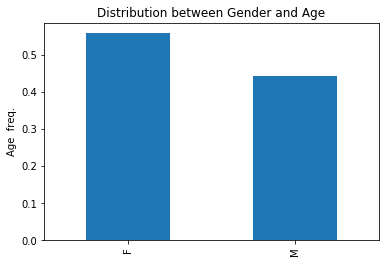

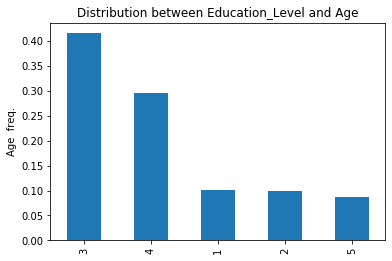

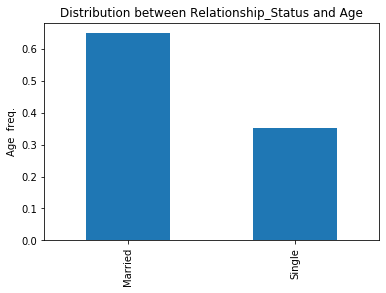

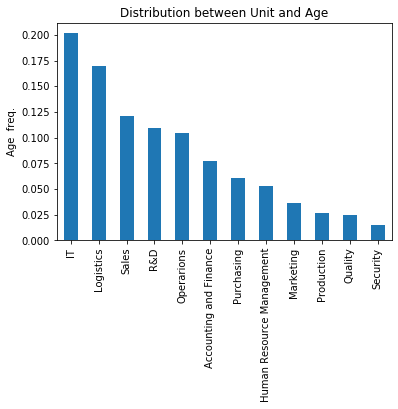

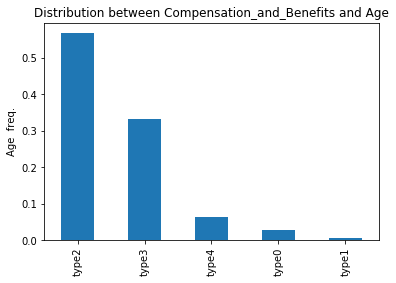

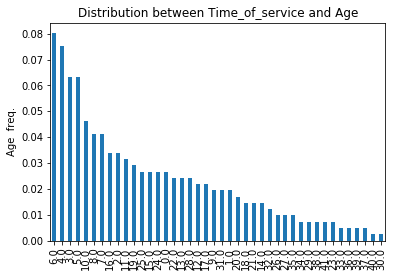

In [20]:
tmp= data[data['Age'].isnull()]
for var in ['Gender', 'Education_Level', 'Relationship_Status','Unit','Compensation_and_Benefits','Time_of_service']:
    
    fig = plt.figure()
    temp=tmp[var].value_counts()/len(tmp)
    fig = temp.plot.bar()
    fig.set_title('Distribution between {} and Age'.format(var))
    fig.set_ylabel('Age  freq.')
    plt.show()

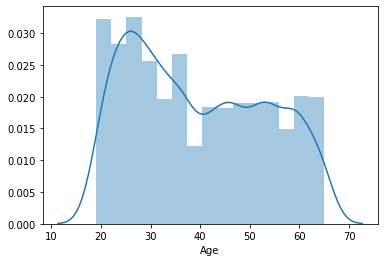

In [21]:
sns.distplot(data[data['Relationship_Status']=='Married']['Age'])


C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\scipy\stats\morestats.py:1371: RuntimeWarning: invalid value encountered in greater_equal
  pos = x >= 0  # binary mask
C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\scipy\stats\morestats.py:1479: RuntimeWarning: invalid value encountered in sign
  loglike += (lmb - 1) * (np.sign(data) * np.log(np.abs(data) + 1)).sum(axis=0)


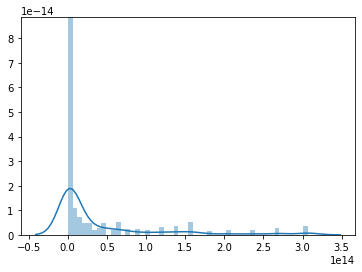

In [22]:
temp=data[data['Relationship_Status']=='Married']['Age'].astype('float')
temp, param = stats.yeojohnson(temp) 
sns.distplot(temp)

In [23]:
def impute_na(df, variable, value):
    return df[variable].fillna(value)

In [24]:
data['Age']= impute_na(data,'Age',data[data['Relationship_Status']=='Married']['Age'].median())
test['Age']= impute_na(test,'Age',data[data['Relationship_Status']=='Married']['Age'].median())
data['Age'].isnull().sum(),test['Age'].isnull().sum()

(0, 0)

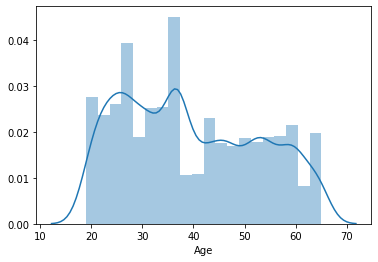

In [25]:
sns.distplot(data['Age'])

In [26]:
def diagnostic_plots(df, variable):
   
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

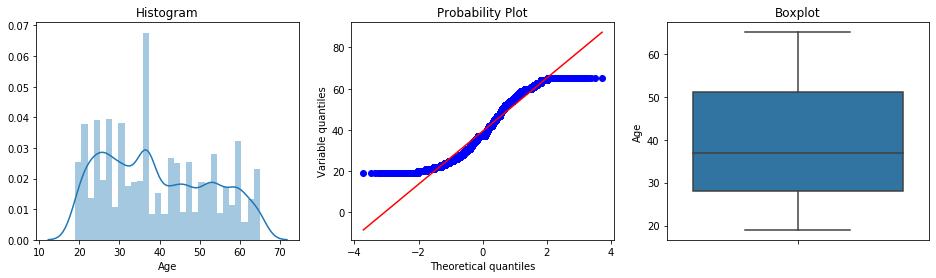

In [27]:
diagnostic_plots(data,'Age')

((array([-3.72151354, -3.49129276, -3.36465703, ...,  3.36465703,
          3.49129276,  3.72151354]),
  array([4.43247405, 4.43247405, 4.43247405, ..., 7.33706023, 7.33706023,
         7.33706023])),
 (0.8089228506025167, 5.940411466482905, 0.9795817795184858))

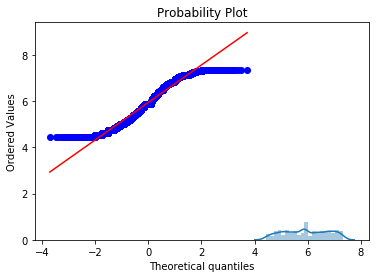

In [28]:
temp, param = stats.yeojohnson(data['Age']) 
sns.distplot(temp)
stats.probplot(temp, dist="norm", plot=plt)

In [29]:
data.head()

Gender   Age  Education_Level Relationship_Status     Hometown  \
0      F  42.0                4             Married     Franklin   
1      M  24.0                3              Single  Springfield   
2      F  58.0                3             Married      Clinton   
3      F  26.0                3              Single      Lebanon   
4      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  ...  Compensation_and_Benefits  \
0                     4           33  ...                      type2   
1                     4           36  ...                      type2   
2                     3           51  ...                      type2   
3                     3           56  ...                      type2   
4                     4           62  ...                      type3   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                3.0     4  0.7516  1.8688   2.0     4     5     3   
1                4.0     3 -0.9612 -0.4537   2.0     3     5     3   
2                1.0     4 -0.9612 -0.4537   3.0     3     8     3   
3                1.0     3 -1.8176 -0.4537   NaN     3     7     3   
4                3.0     1  0.7516 -0.4537   2.0     2     8     2   

   Attrition_rate  
0          0.1841  
1          0.0670  
2          0.0851  
3          0.0668  
4          0.1827  

[5 rows x 23 columns]

In [30]:
age_range = data['Age'].max() -data['Age'].min()
print(age_range,data['Age'].max(),data['Age'].min())

46.0 65.0 19.0


In [31]:
min_value = int(np.floor( data['Age'].min()))
max_value = int(np.floor( data['Age'].max()+1))

bin_length = int(np.round(age_range / 10))
min_value, max_value, bin_length

(19, 66, 5)

In [32]:
intervals = [i for i in range(min_value, max_value+bin_length, bin_length)]
len(intervals)

11

In [33]:
labels = [i for i in range(1, len(intervals))]
labels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [34]:
data['Age_disc'] = pd.cut(x=data['Age'],
                                    bins=intervals,
                                    labels=labels,
                                    include_lowest=True)
data['Age_disc_bins'] = pd.cut(x=data['Age'],
                                    bins=intervals,
                                    include_lowest=True)
test['Age_disc'] = pd.cut(x=test['Age'],
                                    bins=intervals,
                                    labels=labels,
                                    include_lowest=True)
test['Age_disc_bins'] = pd.cut(x=test['Age'],
                                    bins=intervals,
                                    include_lowest=True)

data.head(
)

Gender   Age  Education_Level Relationship_Status     Hometown  \
0      F  42.0                4             Married     Franklin   
1      M  24.0                3              Single  Springfield   
2      F  58.0                3             Married      Clinton   
3      F  26.0                3              Single      Lebanon   
4      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  ...  VAR1    VAR2    VAR3 VAR4  VAR5  \
0                     4           33  ...     4  0.7516  1.8688  2.0     4   
1                     4           36  ...     3 -0.9612 -0.4537  2.0     3   
2                     3           51  ...     4 -0.9612 -0.4537  3.0     3   
3                     3           56  ...     3 -1.8176 -0.4537  NaN     3   
4                     4           62  ...     1  0.7516 -0.4537  2.0     2   

   VAR6  VAR7  Attrition_rate  Age_disc   Age_disc_bins  
0     5     3          0.1841         5    (39.0, 44.0]  
1     5     3          0.0670         1  (18.999, 24.0]  
2     8     3          0.0851         8    (54.0, 59.0]  
3     7     3          0.0668         2    (24.0, 29.0]  
4     8     2          0.1827         3    (29.0, 34.0]  

[5 rows x 25 columns]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

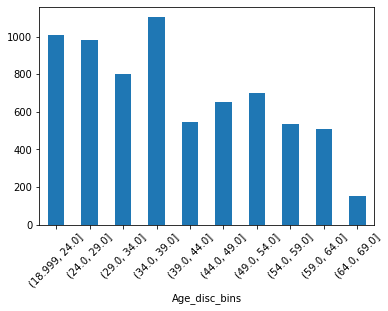

In [35]:
data.groupby('Age_disc_bins')['Attrition_rate'].count().plot.bar()
plt.xticks(rotation=45)

In [372]:
test.shape

(3000, 22)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Age'] = sc.fit_transform(pd.DataFrame(np.array(data['Age']).reshape(7000,1)))

In [373]:
test['Age'] = sc.transform(pd.DataFrame(np.array(test['Age']).reshape(3000,1)))

In [37]:
temp= data.copy()
temp['Attrition_rate'] = np.where(temp['Attrition_rate']>.5,1,0)
print(temp[temp['Attrition_rate']==1].count()/len(temp))
temp[temp['Attrition_rate']==1].count()

Gender                       0.082000
Age                          0.082000
Education_Level              0.082000
Relationship_Status          0.082000
Hometown                     0.082000
Unit                         0.082000
Decision_skill_possess       0.082000
Time_of_service              0.079714
Time_since_promotion         0.082000
growth_rate                  0.082000
Travel_Rate                  0.082000
Post_Level                   0.082000
Pay_Scale                    0.081857
Compensation_and_Benefits    0.082000
Work_Life_balance            0.081857
VAR1                         0.082000
VAR2                         0.075429
VAR3                         0.082000
VAR4                         0.075429
VAR5                         0.082000
VAR6                         0.082000
VAR7                         0.082000
Attrition_rate               0.082000
Age_disc                     0.082000
Age_disc_bins                0.082000
dtype: float64


Gender                       574
Age                          574
Education_Level              574
Relationship_Status          574
Hometown                     574
Unit                         574
Decision_skill_possess       574
Time_of_service              558
Time_since_promotion         574
growth_rate                  574
Travel_Rate                  574
Post_Level                   574
Pay_Scale                    573
Compensation_and_Benefits    574
Work_Life_balance            573
VAR1                         574
VAR2                         528
VAR3                         574
VAR4                         528
VAR5                         574
VAR6                         574
VAR7                         574
Attrition_rate               574
Age_disc                     574
Age_disc_bins                574
dtype: int64

In [38]:
temp.groupby(['Attrition_rate'])['Age_disc_bins'].count()

Attrition_rate
0    6426
1     574
Name: Age_disc_bins, dtype: int64

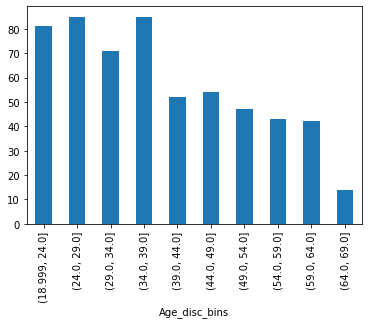

In [39]:
temp= temp[temp['Attrition_rate']==1]
temp.groupby(['Age_disc_bins'])['Attrition_rate'].count().plot.bar()

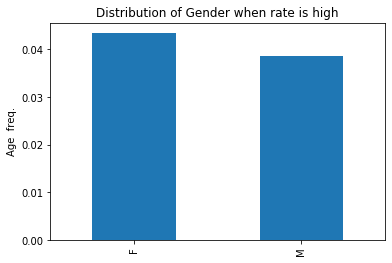

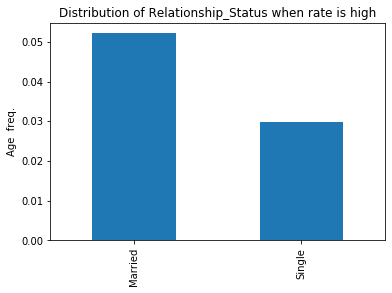

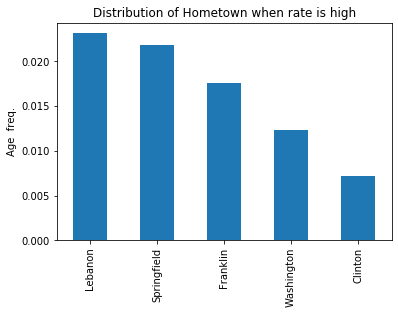

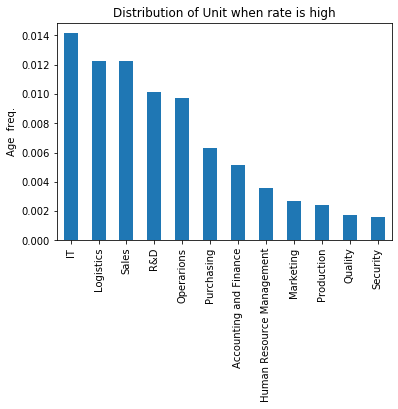

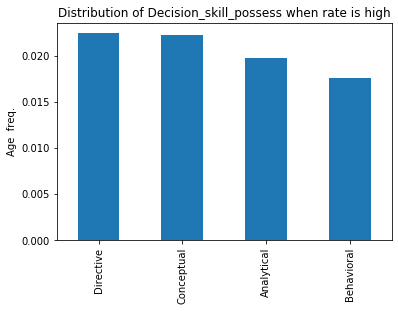

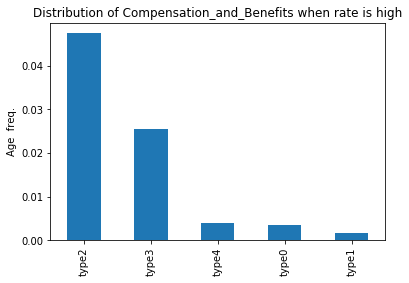

In [40]:
for var in categorical:
    
    fig = plt.figure()
    tmp = temp[var].value_counts()/len(data)
    fig = tmp.plot.bar()
    fig.set_title('Distribution of {} when rate is high'.format(var))
    fig.set_ylabel('Age  freq.')
    plt.show()

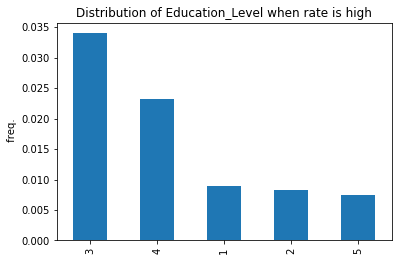

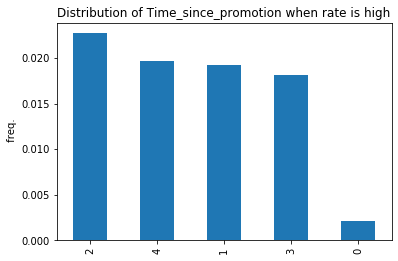

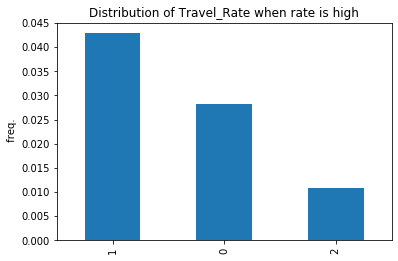

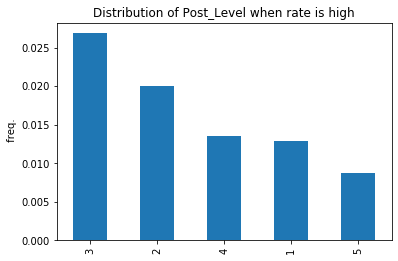

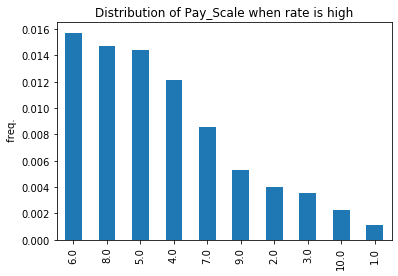

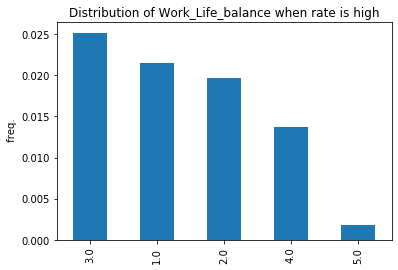

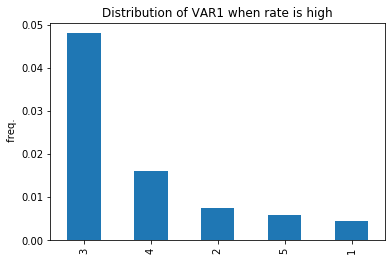

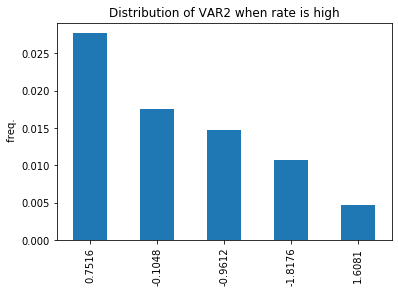

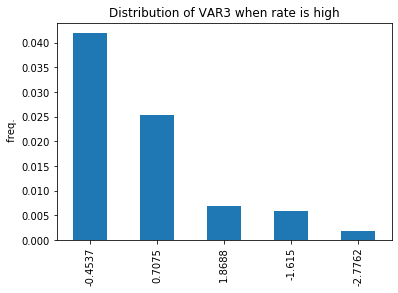

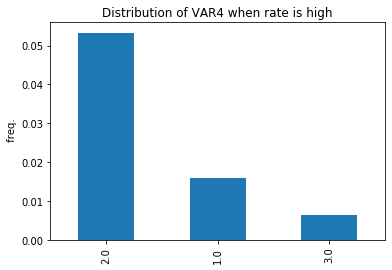

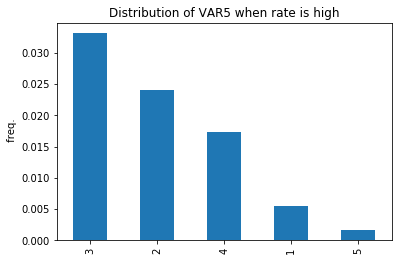

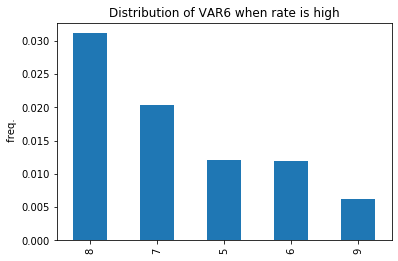

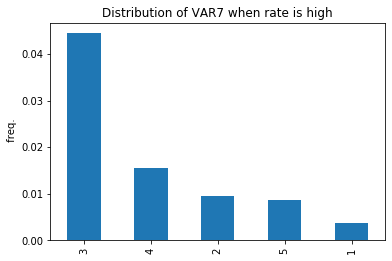

In [41]:
for var in discrete:
    
    fig = plt.figure()
    tmp = temp[var].value_counts()/len(data)
    fig = tmp.plot.bar()
    fig.set_title('Distribution of {} when rate is high'.format(var))
    fig.set_ylabel(' freq.')
    plt.show()

__Gender__

In [42]:
data.head()

Gender       Age  Education_Level Relationship_Status     Hometown  \
0      F  0.191585                4             Married     Franklin   
1      M -1.170623                3              Single  Springfield   
2      F  1.402436                3             Married      Clinton   
3      F -1.019267                3              Single      Lebanon   
4      F -0.640876                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  ...  VAR1    VAR2    VAR3 VAR4  VAR5  \
0                     4           33  ...     4  0.7516  1.8688  2.0     4   
1                     4           36  ...     3 -0.9612 -0.4537  2.0     3   
2                     3           51  ...     4 -0.9612 -0.4537  3.0     3   
3                     3           56  ...     3 -1.8176 -0.4537  NaN     3   
4                     4           62  ...     1  0.7516 -0.4537  2.0     2   

   VAR6  VAR7  Attrition_rate  Age_disc   Age_disc_bins  
0     5     3          0.1841         5    (39.0, 44.0]  
1     5     3          0.0670         1  (18.999, 24.0]  
2     8     3          0.0851         8    (54.0, 59.0]  
3     7     3          0.0668         2    (24.0, 29.0]  
4     8     2          0.1827         3    (29.0, 34.0]  

[5 rows x 25 columns]

In [43]:
intervals=[0,.2,.4,.6,.8,1]

data['Attrition_rate_bins']= pd.cut(data['Attrition_rate'], bins=intervals)
data.head(6)

Gender       Age  Education_Level Relationship_Status     Hometown  \
0      F  0.191585                4             Married     Franklin   
1      M -1.170623                3              Single  Springfield   
2      F  1.402436                3             Married      Clinton   
3      F -1.019267                3              Single      Lebanon   
4      F -0.640876                1             Married  Springfield   
5      M  1.099724                3             Married      Lebanon   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   
5                 Purchasing             Conceptual             19.0   

   Time_since_promotion  growth_rate  ...    VAR2    VAR3  VAR4 VAR5  VAR6  \
0                     4           33  ...  0.7516  1.8688   2.0    4     5   
1                     4           36  ... -0.9612 -0.4537   2.0    3     5   
2                     3           51  ... -0.9612 -0.4537   3.0    3     8   
3                     3           56  ... -1.8176 -0.4537   NaN    3     7   
4                     4           62  ...  0.7516 -0.4537   2.0    2     8   
5                     1           21  ... -1.8176  1.8688   2.0    2     8   

   VAR7  Attrition_rate  Age_disc   Age_disc_bins  Attrition_rate_bins  
0     3          0.1841         5    (39.0, 44.0]           (0.0, 0.2]  
1     3          0.0670         1  (18.999, 24.0]           (0.0, 0.2]  
2     3          0.0851         8    (54.0, 59.0]           (0.0, 0.2]  
3     3          0.0668         2    (24.0, 29.0]           (0.0, 0.2]  
4     2          0.1827         3    (29.0, 34.0]           (0.0, 0.2]  
5     3          0.7613         7    (49.0, 54.0]           (0.6, 0.8]  

[6 rows x 26 columns]

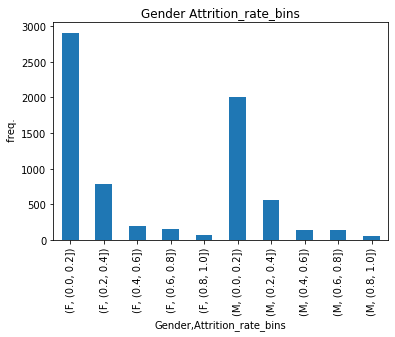

In [44]:
def category_wise_perc(var,target):
    fig = data.groupby([var])[target].value_counts().plot.bar()
    fig.set_title('{} {}'.format(var,target))
    fig.set_ylabel(' freq.')
    plt.show()
category_wise_perc('Gender','Attrition_rate_bins')

In [45]:
data.Gender.isnull().sum()

0

In [46]:
data.Gender.describe()

count     7000
unique       2
top          F
freq      4114
Name: Gender, dtype: object

In [47]:
def discretize(var,bin_num):
    min_value = int(np.floor( data[var].min()))
    max_value = int(np.floor( data[var].max()+1))
    rang= max_value-min_value

    bin_length = int(np.round(rang / bin_num))
#     min_value, max_value, bin_length

    intervals = [i for i in range(min_value, max_value+bin_length, bin_length)]

    labels = [i for i in range(1, len(intervals))]

    data['{}_disc'.format(var)] = pd.cut(x=data[var],
                                    bins=intervals,
                                    labels=labels,
                                    include_lowest=True)
    data['{}_disc_bins'.format(var)] = pd.cut(x=data[var],
                                    bins=intervals,
                                    include_lowest=True)

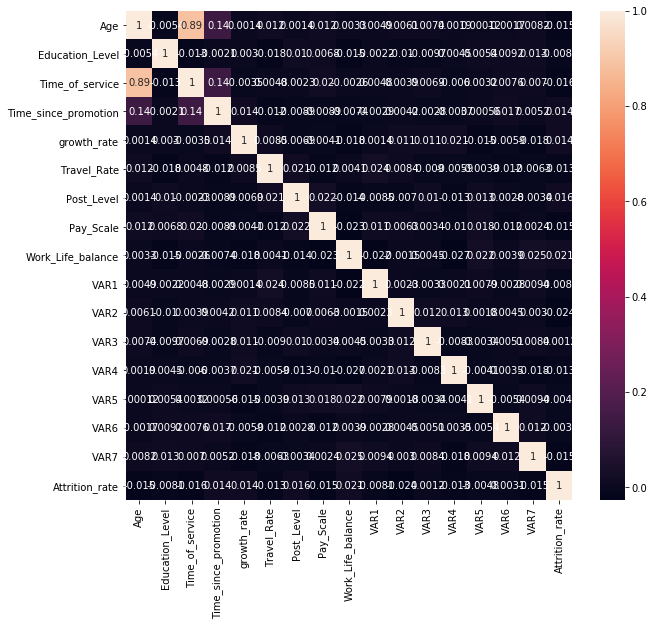

In [48]:
plt.figure(figsize=(10,9))
 
sns.heatmap(data.corr(), annot = True)

In [49]:
data['Gender']= np.where(data['Gender']=='M',1,0)
test['Gender']= np.where(test['Gender']=='M',1,0)

In [50]:
data.Gender.value_counts()

0    4114
1    2886
Name: Gender, dtype: int64

__Education_Level__
 1) can combine 1 2 5 under rare.

In [51]:
data['Education_Level'].describe()

count    7000.000000
mean        3.187857
std         1.065102
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education_Level, dtype: float64

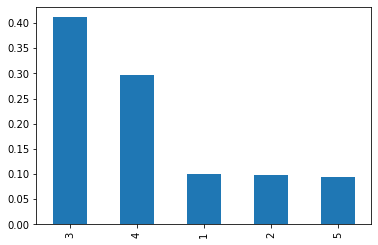

In [52]:
temp = data['Education_Level'].value_counts()/7000
temp.plot.bar()

In [53]:
data.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate',
       'Age_disc', 'Age_disc_bins', 'Attrition_rate_bins'],
      dtype='object')

In [54]:
def calculate_mean_target_per_category(df, var,target):

    length = len(df)

    temp_df = pd.Series(df[var].value_counts() / length).reset_index()
    temp_df.columns = [var, 'perc']

    temp_df = temp_df.merge(df.groupby([var])[target].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [55]:
temp_df=calculate_mean_target_per_category(data,'Education_Level','Work_Life_balance')

In [56]:
def plot_categories(df, var,target):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc"], color='lightgrey')
    ax2.plot(df.index, df[target], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage  per category')
    ax.set_xlabel('{} {}'.format(var,target))
    ax2.set_ylabel('Average of target per category')
    plt.show()

In [57]:
discrete.remove('Education_Level')

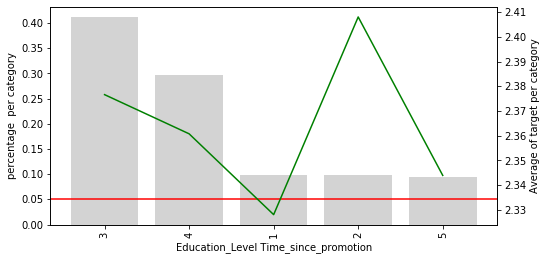

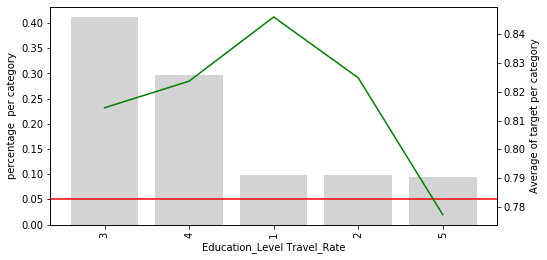

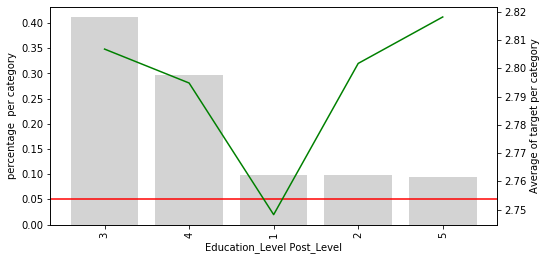

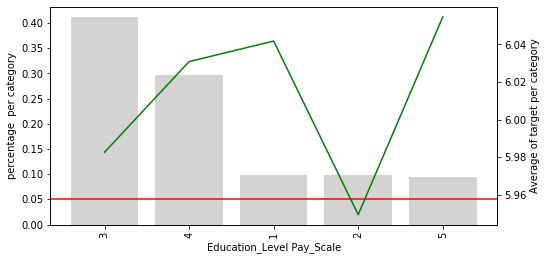

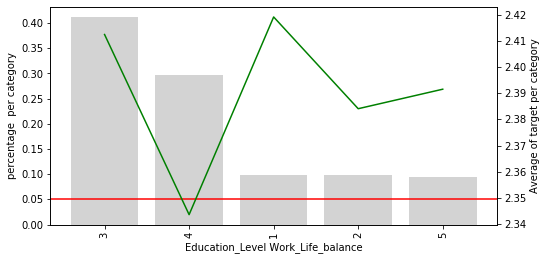

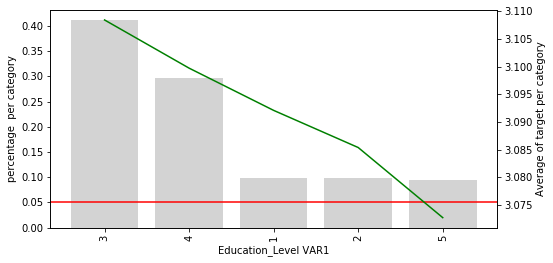

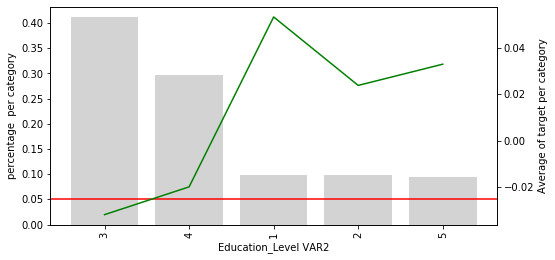

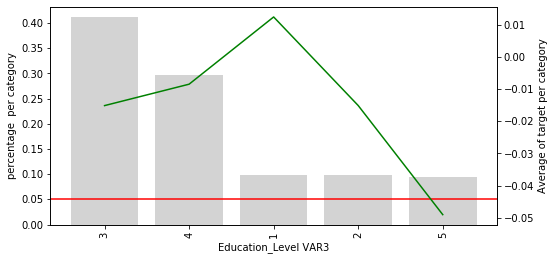

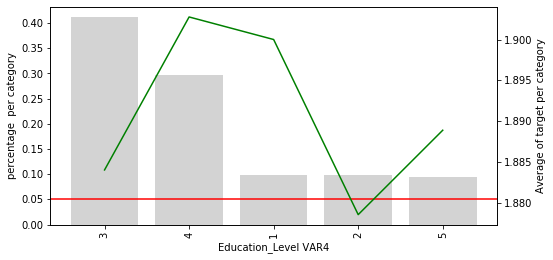

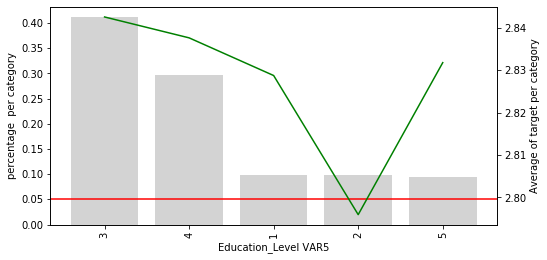

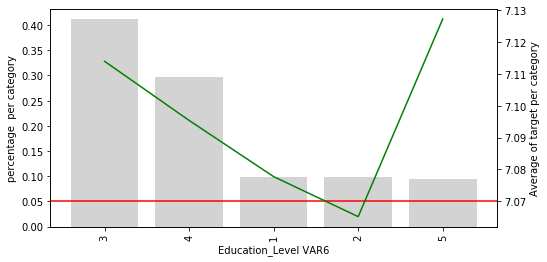

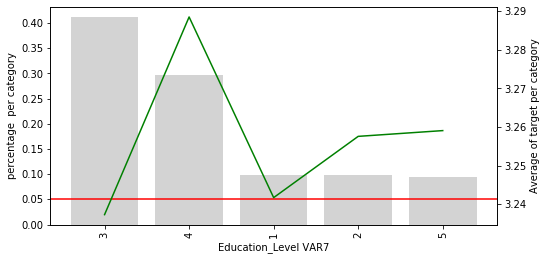

In [58]:
for var in discrete:
    temp_df = calculate_mean_target_per_category(data,'Education_Level',var)
    plot_categories(temp_df, 'Education_Level',var)

In [59]:
discrete.append('Education_Level')

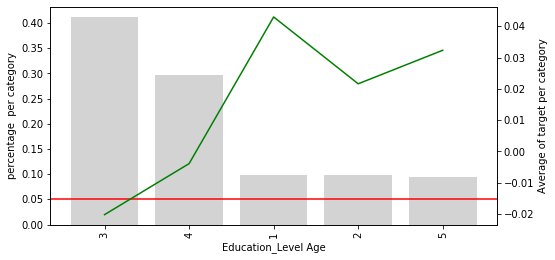

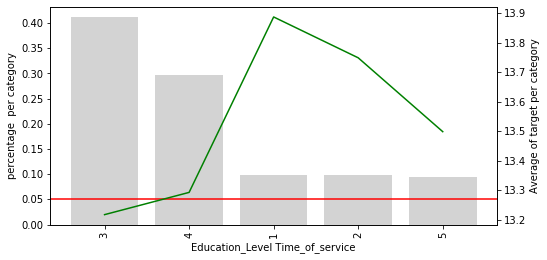

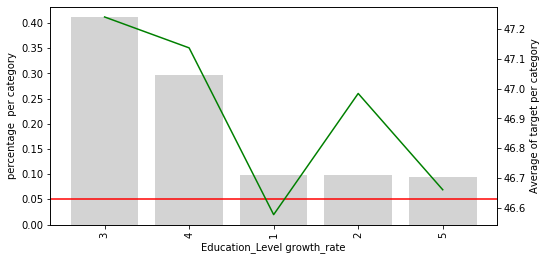

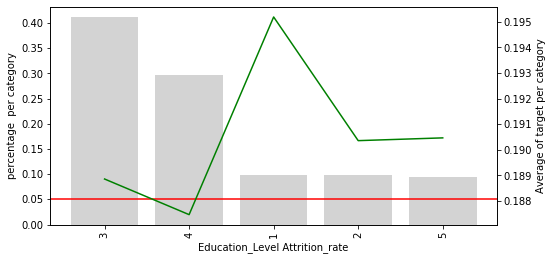

In [60]:
for var in continuous:
    temp_df = calculate_mean_target_per_category(data,'Education_Level',var)
    plot_categories(temp_df, 'Education_Level',var)

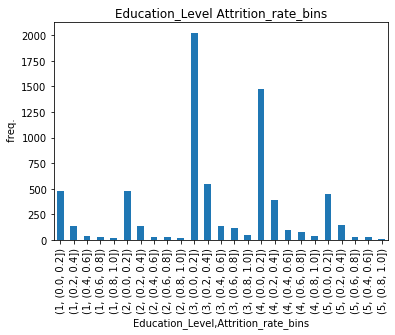

In [61]:
category_wise_perc('Education_Level','Attrition_rate_bins')


__Relationship_Status__

In [62]:
data.Relationship_Status.value_counts()

Married    4520
Single     2480
Name: Relationship_Status, dtype: int64

In [63]:
data['Relationship_Status'] = np.where(data['Relationship_Status']=='Single',1,0)
test['Relationship_Status'] = np.where(test['Relationship_Status']=='Single',1,0)

data.head()

Gender       Age  Education_Level  Relationship_Status     Hometown  \
0       0  0.191585                4                    0     Franklin   
1       1 -1.170623                3                    1  Springfield   
2       0  1.402436                3                    0      Clinton   
3       0 -1.019267                3                    1      Lebanon   
4       0 -0.640876                1                    0  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  ...    VAR2    VAR3  VAR4 VAR5  VAR6  \
0                     4           33  ...  0.7516  1.8688   2.0    4     5   
1                     4           36  ... -0.9612 -0.4537   2.0    3     5   
2                     3           51  ... -0.9612 -0.4537   3.0    3     8   
3                     3           56  ... -1.8176 -0.4537   NaN    3     7   
4                     4           62  ...  0.7516 -0.4537   2.0    2     8   

   VAR7  Attrition_rate  Age_disc   Age_disc_bins  Attrition_rate_bins  
0     3          0.1841         5    (39.0, 44.0]           (0.0, 0.2]  
1     3          0.0670         1  (18.999, 24.0]           (0.0, 0.2]  
2     3          0.0851         8    (54.0, 59.0]           (0.0, 0.2]  
3     3          0.0668         2    (24.0, 29.0]           (0.0, 0.2]  
4     2          0.1827         3    (29.0, 34.0]           (0.0, 0.2]  

[5 rows x 26 columns]

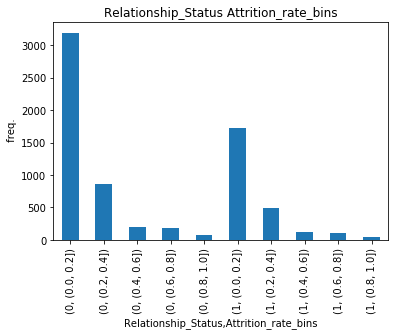

In [64]:
category_wise_perc('Relationship_Status','Attrition_rate_bins')

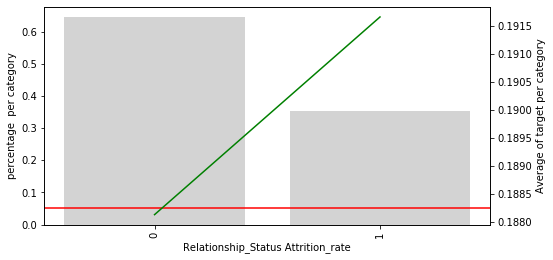

In [65]:
temp_df = calculate_mean_target_per_category(data,'Relationship_Status','Attrition_rate')
plot_categories(temp_df, 'Relationship_Status','Attrition_rate')

__Hometown__

In [66]:
print(data.Hometown.value_counts())
data.Hometown.value_counts().sum()

Lebanon        2070
Springfield    1736
Franklin       1523
Washington     1106
Clinton         565
Name: Hometown, dtype: int64


7000

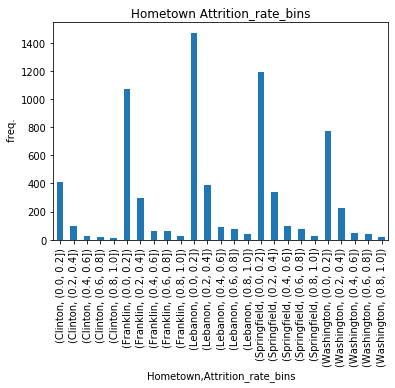

In [67]:
category_wise_perc('Hometown','Attrition_rate_bins')

In [68]:
onehotencoding=['Hometown']

__Unit__  1) Last 5 categories in general anaysis graph can be grouped under rare.

In [69]:
data.head()

Gender       Age  Education_Level  Relationship_Status     Hometown  \
0       0  0.191585                4                    0     Franklin   
1       1 -1.170623                3                    1  Springfield   
2       0  1.402436                3                    0      Clinton   
3       0 -1.019267                3                    1      Lebanon   
4       0 -0.640876                1                    0  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  ...    VAR2    VAR3  VAR4 VAR5  VAR6  \
0                     4           33  ...  0.7516  1.8688   2.0    4     5   
1                     4           36  ... -0.9612 -0.4537   2.0    3     5   
2                     3           51  ... -0.9612 -0.4537   3.0    3     8   
3                     3           56  ... -1.8176 -0.4537   NaN    3     7   
4                     4           62  ...  0.7516 -0.4537   2.0    2     8   

   VAR7  Attrition_rate  Age_disc   Age_disc_bins  Attrition_rate_bins  
0     3          0.1841         5    (39.0, 44.0]           (0.0, 0.2]  
1     3          0.0670         1  (18.999, 24.0]           (0.0, 0.2]  
2     3          0.0851         8    (54.0, 59.0]           (0.0, 0.2]  
3     3          0.0668         2    (24.0, 29.0]           (0.0, 0.2]  
4     2          0.1827         3    (29.0, 34.0]           (0.0, 0.2]  

[5 rows x 26 columns]

In [70]:
print(data.Unit.value_counts())
print(data.Unit.value_counts().sum())
data.Unit.nunique()

IT                           1394
Logistics                    1173
Sales                         943
Operarions                    706
R&D                           680
Purchasing                    504
Accounting and Finance        496
Human Resource Management     344
Marketing                     212
Production                    211
Quality                       193
Security                      144
Name: Unit, dtype: int64
7000


12

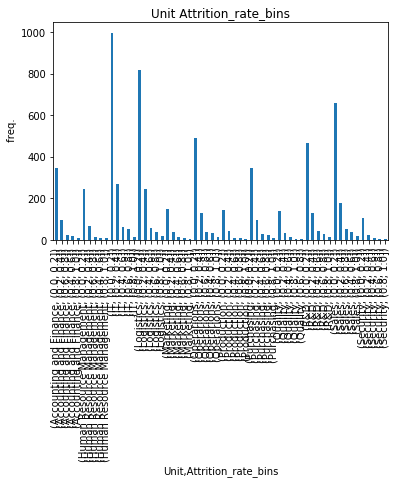

In [71]:
category_wise_perc('Unit','Attrition_rate_bins')

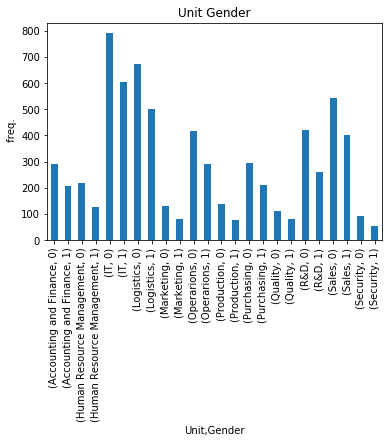

In [72]:
category_wise_perc('Unit','Gender')

In [73]:
data.groupby([('Unit')])['Gender'].value_counts()

Unit                       Gender
Accounting and Finance     0         290
                           1         206
Human Resource Management  0         218
                           1         126
IT                         0         791
                           1         603
Logistics                  0         673
                           1         500
Marketing                  0         131
                           1          81
Operarions                 0         416
                           1         290
Production                 0         136
                           1          75
Purchasing                 0         295
                           1         209
Quality                    0         112
                           1          81
R&D                        0         419
                           1         261
Sales                      0         543
                           1         400
Security                   0          90
                       

In [74]:
543/400, 90/54,419/261,131/81

(1.3575, 1.6666666666666667, 1.6053639846743295, 1.617283950617284)

In [75]:
data.groupby([('Hometown')])['Gender'].value_counts()

Hometown     Gender
Clinton      0          332
             1          233
Franklin     0          869
             1          654
Lebanon      0         1194
             1          876
Springfield  0         1021
             1          715
Washington   0          698
             1          408
Name: Gender, dtype: int64

In [76]:
332/223,869/654,1194/876

(1.4887892376681615, 1.3287461773700306, 1.3630136986301369)

In [77]:
onehotencoding.append('Unit')

In [78]:
data.head()

Gender       Age  Education_Level  Relationship_Status     Hometown  \
0       0  0.191585                4                    0     Franklin   
1       1 -1.170623                3                    1  Springfield   
2       0  1.402436                3                    0      Clinton   
3       0 -1.019267                3                    1      Lebanon   
4       0 -0.640876                1                    0  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  ...    VAR2    VAR3  VAR4 VAR5  VAR6  \
0                     4           33  ...  0.7516  1.8688   2.0    4     5   
1                     4           36  ... -0.9612 -0.4537   2.0    3     5   
2                     3           51  ... -0.9612 -0.4537   3.0    3     8   
3                     3           56  ... -1.8176 -0.4537   NaN    3     7   
4                     4           62  ...  0.7516 -0.4537   2.0    2     8   

   VAR7  Attrition_rate  Age_disc   Age_disc_bins  Attrition_rate_bins  
0     3          0.1841         5    (39.0, 44.0]           (0.0, 0.2]  
1     3          0.0670         1  (18.999, 24.0]           (0.0, 0.2]  
2     3          0.0851         8    (54.0, 59.0]           (0.0, 0.2]  
3     3          0.0668         2    (24.0, 29.0]           (0.0, 0.2]  
4     2          0.1827         3    (29.0, 34.0]           (0.0, 0.2]  

[5 rows x 26 columns]

__Decision_skill_possess__ 1) those with conceptual and detective  skills have high rate and behavorial have lowest


In [79]:
print(data.Decision_skill_possess.value_counts())
print(data.Decision_skill_possess.value_counts().sum())
data.Decision_skill_possess.nunique()

Conceptual    1756
Analytical    1755
Directive     1753
Behavioral    1736
Name: Decision_skill_possess, dtype: int64
7000


4

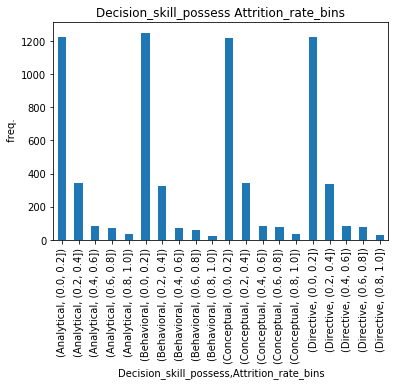

In [80]:
category_wise_perc('Decision_skill_possess','Attrition_rate_bins')

In [81]:
onehotencoding=['Unit', 'Hometown','Decision_skill_possess']
onehotencoding

['Unit', 'Hometown', 'Decision_skill_possess']

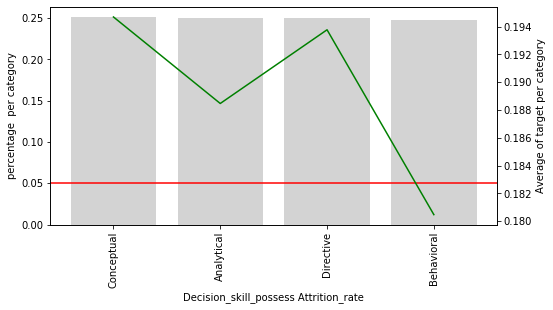

In [82]:
temp_df = calculate_mean_target_per_category(data,'Decision_skill_possess','Attrition_rate')
plot_categories(temp_df, 'Decision_skill_possess','Attrition_rate')

In [83]:
data.head()

Gender       Age  Education_Level  Relationship_Status     Hometown  \
0       0  0.191585                4                    0     Franklin   
1       1 -1.170623                3                    1  Springfield   
2       0  1.402436                3                    0      Clinton   
3       0 -1.019267                3                    1      Lebanon   
4       0 -0.640876                1                    0  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  ...    VAR2    VAR3  VAR4 VAR5  VAR6  \
0                     4           33  ...  0.7516  1.8688   2.0    4     5   
1                     4           36  ... -0.9612 -0.4537   2.0    3     5   
2                     3           51  ... -0.9612 -0.4537   3.0    3     8   
3                     3           56  ... -1.8176 -0.4537   NaN    3     7   
4                     4           62  ...  0.7516 -0.4537   2.0    2     8   

   VAR7  Attrition_rate  Age_disc   Age_disc_bins  Attrition_rate_bins  
0     3          0.1841         5    (39.0, 44.0]           (0.0, 0.2]  
1     3          0.0670         1  (18.999, 24.0]           (0.0, 0.2]  
2     3          0.0851         8    (54.0, 59.0]           (0.0, 0.2]  
3     3          0.0668         2    (24.0, 29.0]           (0.0, 0.2]  
4     2          0.1827         3    (29.0, 34.0]           (0.0, 0.2]  

[5 rows x 26 columns]

__Time_of_service__  1) has 44 unique values. discretization can be performed. 2) exp is best suited and this is carried as of now. Normal can be tried.  2) value 42 have  high rates. 3) Imputation can be done using a model of concerned features

In [84]:
print(data.Time_of_service.value_counts())
print(data.Time_of_service.value_counts().sum())
data.Time_of_service.nunique()

6.0     545
5.0     503
3.0     471
4.0     439
2.0     297
8.0     276
7.0     258
10.0    218
9.0     205
13.0    195
12.0    191
15.0    178
11.0    178
14.0    175
0.0     162
18.0    154
16.0    150
22.0    146
20.0    142
21.0    137
24.0    129
1.0     127
17.0    124
19.0    122
23.0    118
25.0    117
27.0    114
28.0    113
26.0    109
30.0     98
31.0     86
29.0     82
33.0     71
32.0     65
35.0     60
34.0     55
37.0     51
36.0     51
38.0     48
39.0     29
40.0     24
41.0     18
42.0     17
43.0      8
Name: Time_of_service, dtype: int64
6856


44

In [85]:
data.Time_of_service.describe()

count    6856.000000
mean       13.385064
std        10.364188
min         0.000000
25%         5.000000
50%        10.000000
75%        21.000000
max        43.000000
Name: Time_of_service, dtype: float64

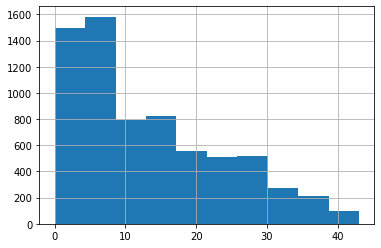

In [86]:
data.Time_of_service.hist()

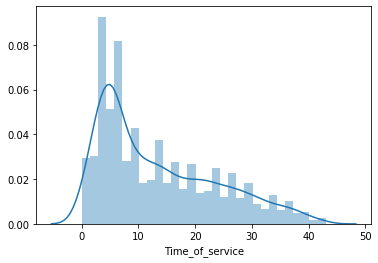

In [87]:
sns.distplot(data['Time_of_service'], bins=30)

C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


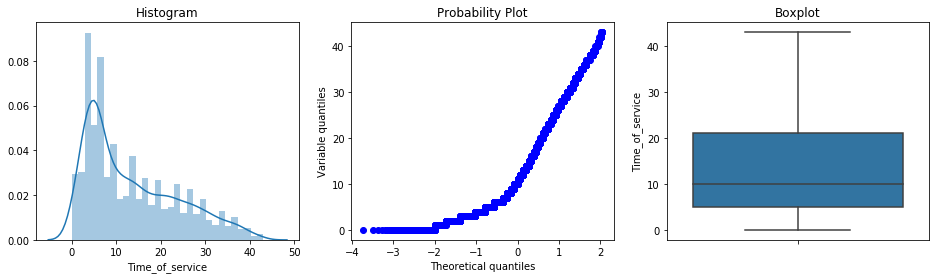

In [88]:
diagnostic_plots(data,'Time_of_service')

C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\scipy\stats\morestats.py:1371: RuntimeWarning: invalid value encountered in greater_equal
  pos = x >= 0  # binary mask
C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\scipy\stats\morestats.py:1479: RuntimeWarning: invalid value encountered in sign
  loglike += (lmb - 1) * (np.sign(data) * np.log(np.abs(data) + 1)).sum(axis=0)


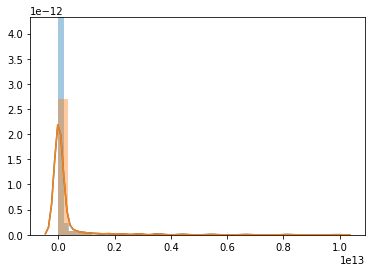

In [89]:
temp, param = stats.yeojohnson(data['Time_of_service']) 
sns.distplot(temp)
sns.distplot(temp, bins=30)

In [90]:
loga = np.log(data['Time_of_service'])
log_=[]
for i in loga:
    if i == loga.min():
        log_.append(2.5)
    else:
        log_.append(i)
max(log_)

C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


3.7612001156935624

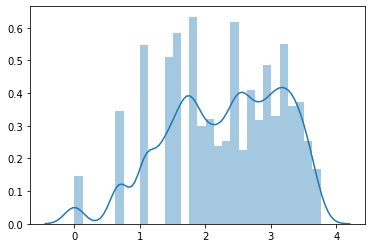

In [91]:
sns.distplot(log_, bins=30)

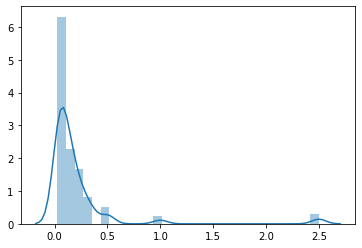

In [92]:
reciprocal = 1 / (data['Time_of_service']) 
reciprocal_ = []
for i in reciprocal:
    if i == reciprocal.max():
        reciprocal_.append(2.5)
    else:
        reciprocal_.append(i)
sns.distplot(reciprocal_,bins=30)

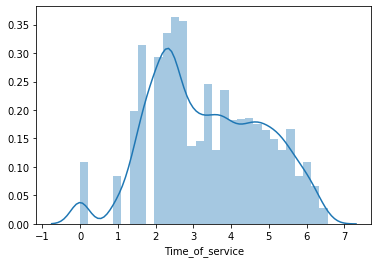

In [93]:
exp = data['Time_of_service']**(1/2) 
sns.distplot(exp,bins=30)

In [94]:
data['Time_of_service'] = data['Time_of_service']**(1/2) 
test['Time_of_service'] = test['Time_of_service']**(1/2) 


C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Mayank\anaconda3\envs\tf\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


((array([-3.72151354, -3.49129276, -3.36465703, ...,  3.36465703,
          3.49129276,  3.72151354]),
  array([ 0.,  0.,  0., ..., nan, nan, nan])),
 (nan, nan, nan))

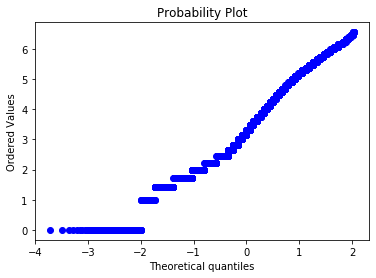

In [95]:
stats.probplot(exp, dist="norm", plot=plt)

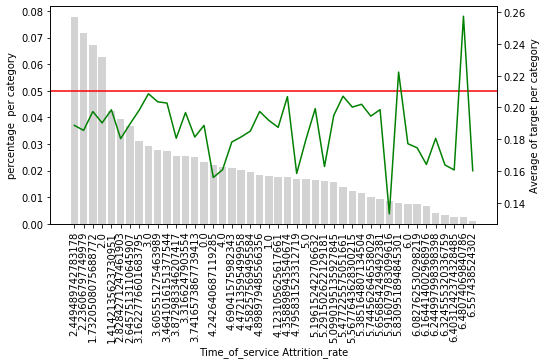

In [96]:
temp_df = calculate_mean_target_per_category(data,'Time_of_service','Attrition_rate')
plot_categories(temp_df, 'Time_of_service','Attrition_rate')

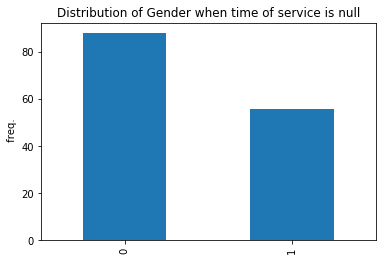

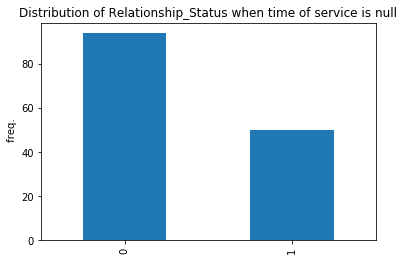

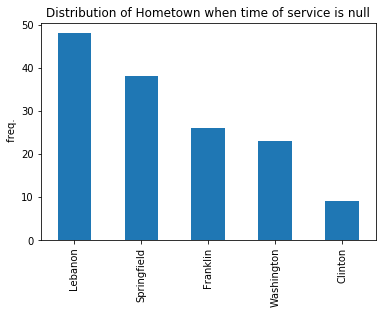

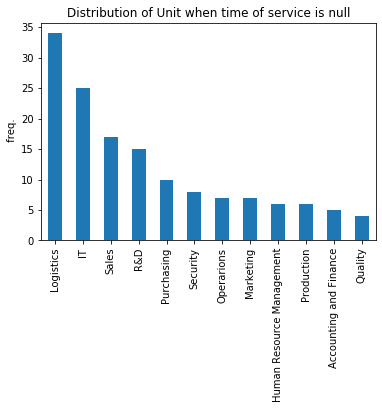

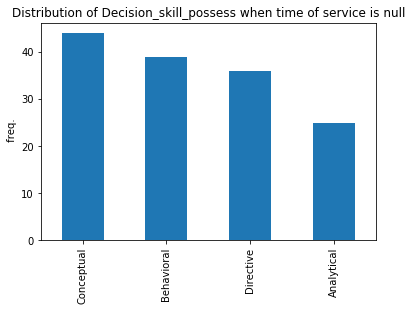

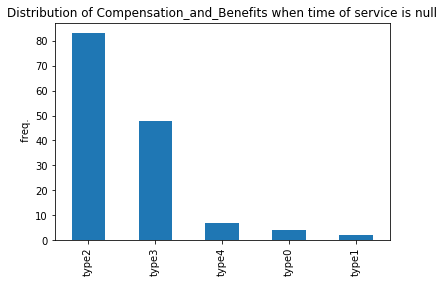

In [97]:
null= data[data['Time_of_service'].isnull()==True]
for var in categorical:
    
    fig = plt.figure()
    tmp = null[var].value_counts()
    
    fig = tmp.plot.bar()
    fig.set_title('Distribution of {} when time of service is null'.format(var))
    fig.set_ylabel(' freq.')
    plt.show()

In [98]:
numerical.remove('Time_of_service')

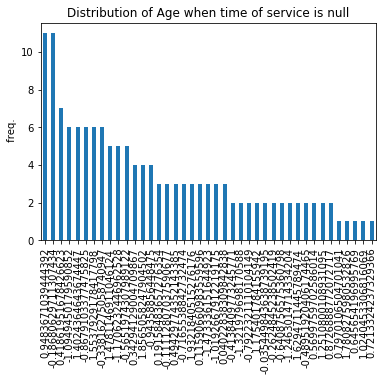

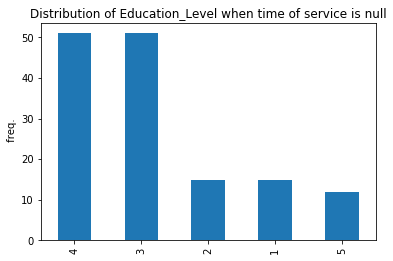

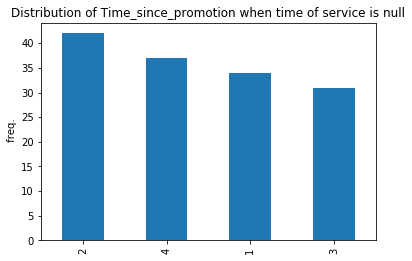

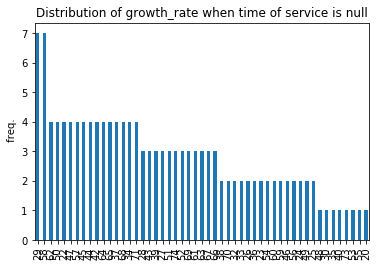

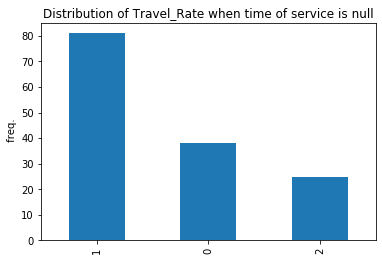

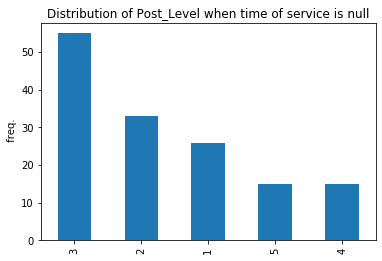

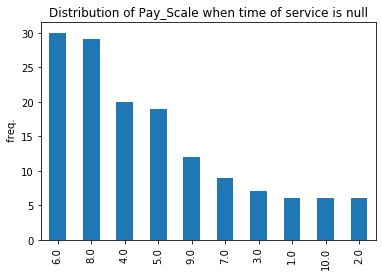

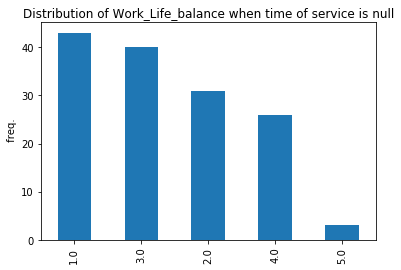

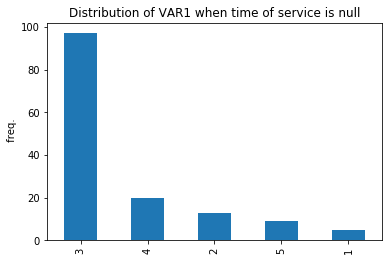

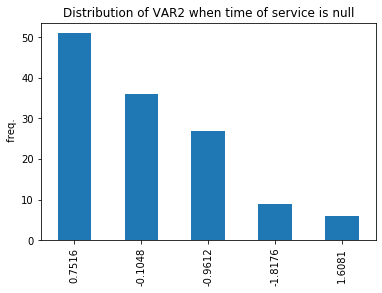

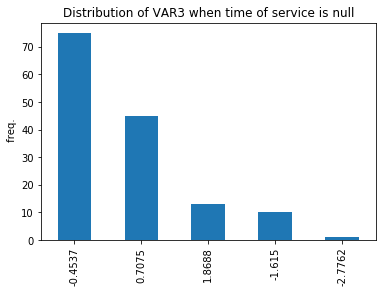

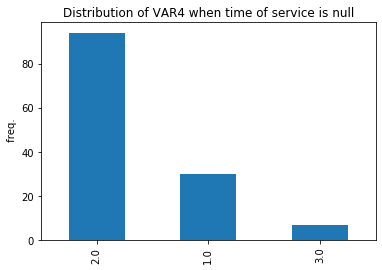

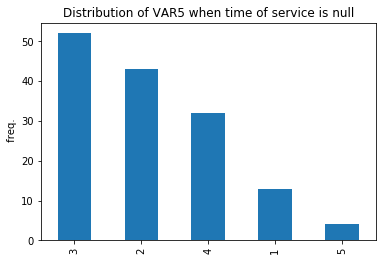

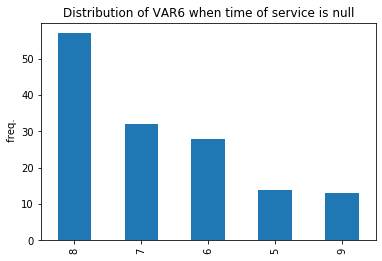

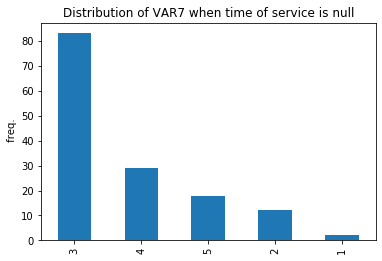

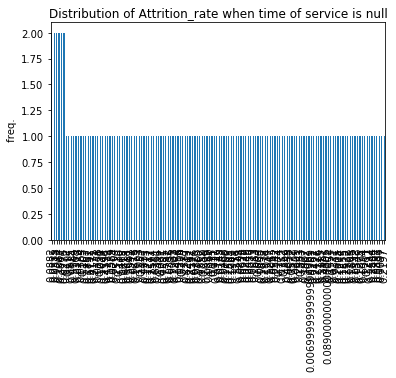

In [99]:
for var in numerical:
    
    fig = plt.figure()
    tmp = null[var].value_counts()
    fig = tmp.plot.bar()
    fig.set_title('Distribution of {} when time of service is null'.format(var))
    fig.set_ylabel(' freq.')
    plt.show()

In [100]:
numerical.append('Time_of_service')

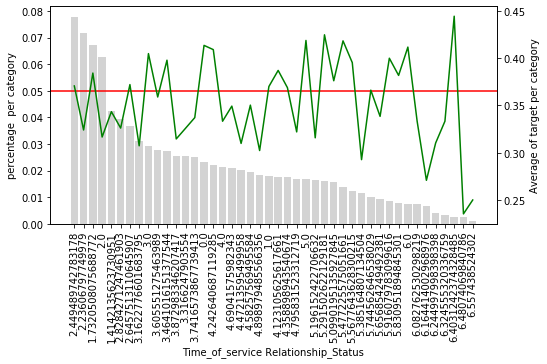

In [101]:
temp_df = calculate_mean_target_per_category(data,'Time_of_service','Relationship_Status')
plot_categories(temp_df, 'Time_of_service','Relationship_Status')

In [102]:
data['Time_of_service']= impute_na(data,'Time_of_service',data[data['Relationship_Status']==0]['Time_of_service'].mean())
test['Time_of_service']= impute_na(test,'Time_of_service',data[data['Relationship_Status']==0]['Time_of_service'].mean())

__Time_since_promotion__  1)4 & 2  have the highest rates


AxesSubplot(0.125,0.125;0.775x0.755)
7000


5

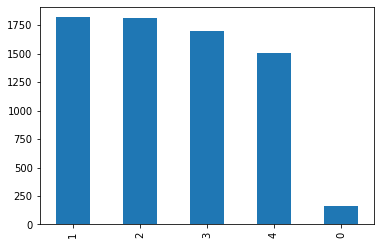

In [103]:
print(data.Time_since_promotion.value_counts().plot.bar())
print(data.Time_since_promotion.value_counts().sum())
data.Time_since_promotion.nunique()

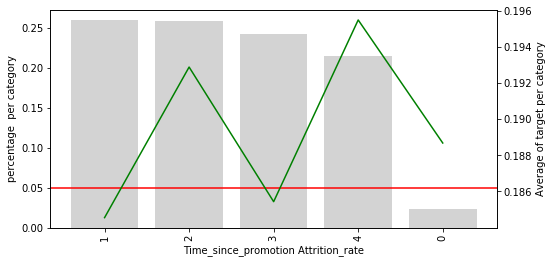

In [104]:
temp_df = calculate_mean_target_per_category(data,'Time_since_promotion','Attrition_rate')
plot_categories(temp_df, 'Time_since_promotion','Attrition_rate')

In [105]:
onehotencoding.append('Time_since_promotion')

In [106]:
data.head()

Gender       Age  Education_Level  Relationship_Status     Hometown  \
0       0  0.191585                4                    0     Franklin   
1       1 -1.170623                3                    1  Springfield   
2       0  1.402436                3                    0      Clinton   
3       0 -1.019267                3                    1      Lebanon   
4       0 -0.640876                1                    0  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual         2.000000   
1                  Logistics             Analytical         2.236068   
2                    Quality             Conceptual         5.196152   
3  Human Resource Management             Behavioral         2.000000   
4                  Logistics             Conceptual         2.236068   

   Time_since_promotion  growth_rate  ...    VAR2    VAR3  VAR4 VAR5  VAR6  \
0                     4           33  ...  0.7516  1.8688   2.0    4     5   
1                     4           36  ... -0.9612 -0.4537   2.0    3     5   
2                     3           51  ... -0.9612 -0.4537   3.0    3     8   
3                     3           56  ... -1.8176 -0.4537   NaN    3     7   
4                     4           62  ...  0.7516 -0.4537   2.0    2     8   

   VAR7  Attrition_rate  Age_disc   Age_disc_bins  Attrition_rate_bins  
0     3          0.1841         5    (39.0, 44.0]           (0.0, 0.2]  
1     3          0.0670         1  (18.999, 24.0]           (0.0, 0.2]  
2     3          0.0851         8    (54.0, 59.0]           (0.0, 0.2]  
3     3          0.0668         2    (24.0, 29.0]           (0.0, 0.2]  
4     2          0.1827         3    (29.0, 34.0]           (0.0, 0.2]  

[5 rows x 26 columns]

__growth_rate__  1) discretization can be performed  2)var7 is very high when growth rate is 28. 3) edu level is high when growth is 71. 3) Post level is high at 28 growth rate.

In [107]:
print(data.growth_rate.describe())
print(data.growth_rate.value_counts().sum())
data.growth_rate.nunique()

count    7000.000000
mean       47.064286
std        15.761406
min        20.000000
25%        33.000000
50%        47.000000
75%        61.000000
max        74.000000
Name: growth_rate, dtype: float64
7000


55

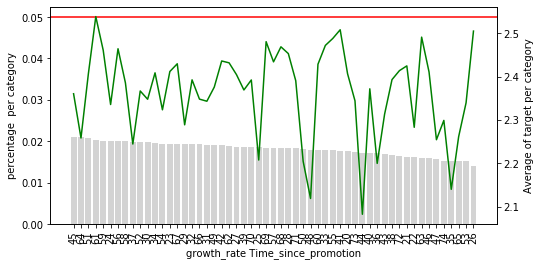

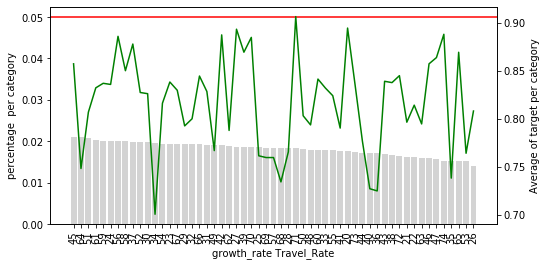

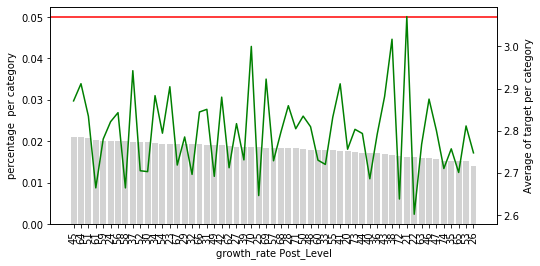

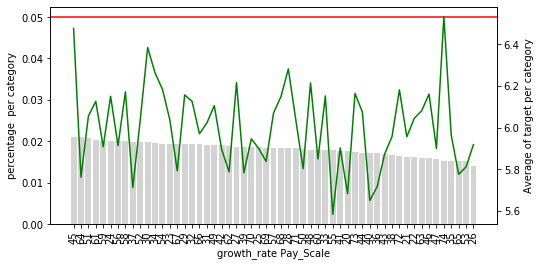

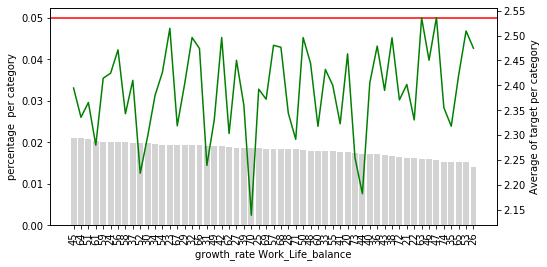

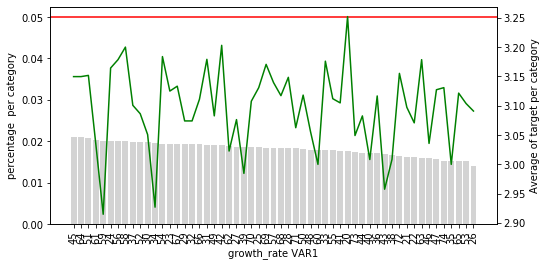

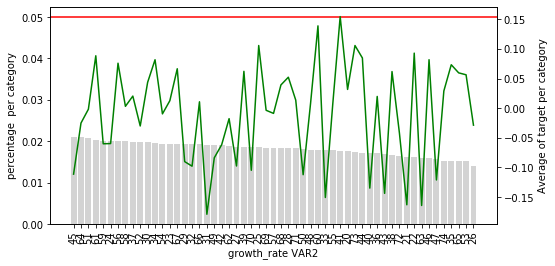

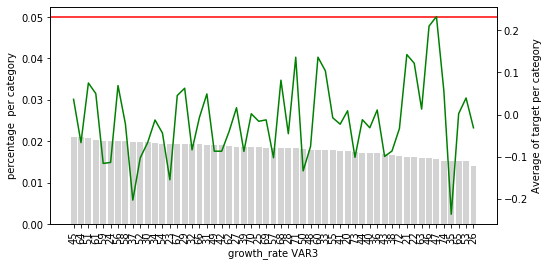

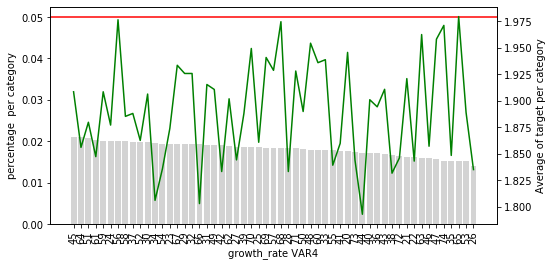

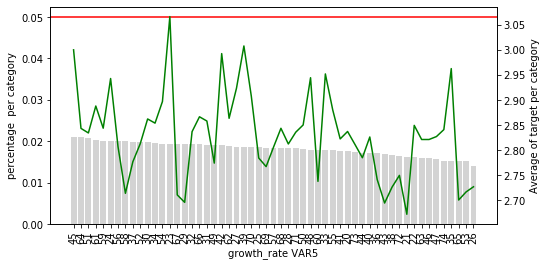

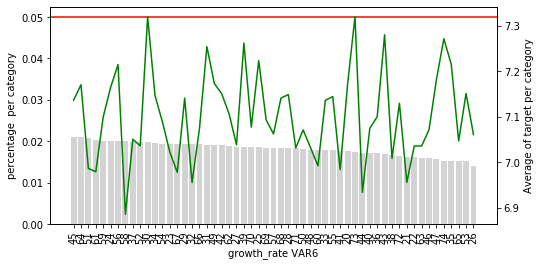

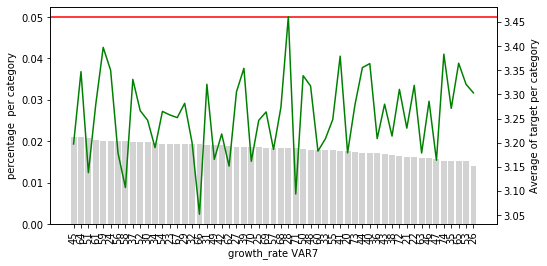

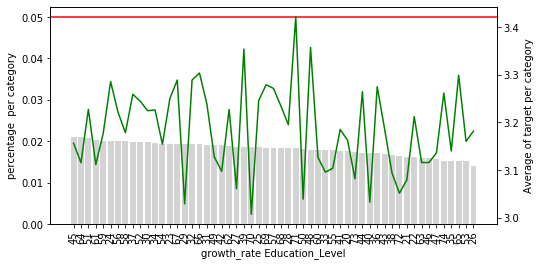

In [108]:
for  var in discrete:
    temp_df = calculate_mean_target_per_category(data,'growth_rate',var)
    plot_categories(temp_df, 'growth_rate',var)


In [109]:
data.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate',
       'Age_disc', 'Age_disc_bins', 'Attrition_rate_bins'],
      dtype='object')

__Travel_Rate__  1) many dependencies can be found. check tempdf graphs.  2) 0 have the highest rate.

In [110]:
print(data.Travel_Rate.value_counts())
print(data.Travel_Rate.value_counts().sum())
data.Travel_Rate.nunique()

1    3827
0    2224
2     949
Name: Travel_Rate, dtype: int64
7000


3

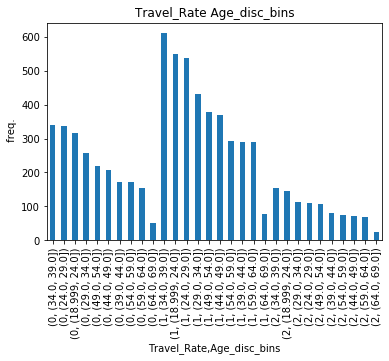

In [111]:
category_wise_perc('Travel_Rate','Age_disc_bins')

In [112]:
discrete.remove('Travel_Rate')

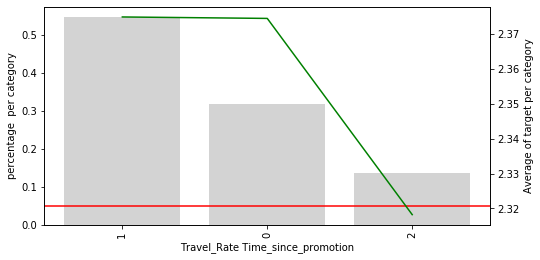

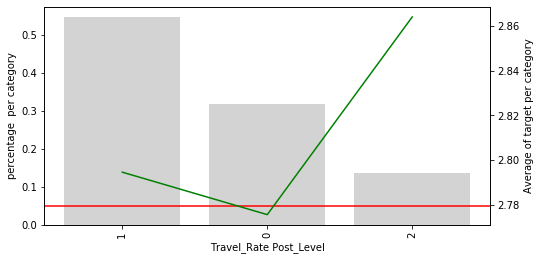

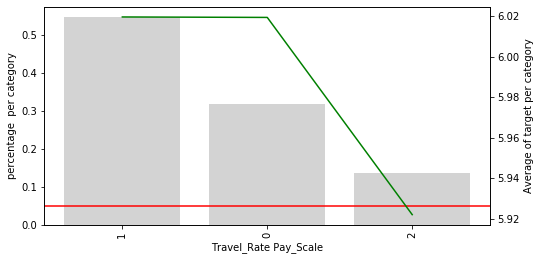

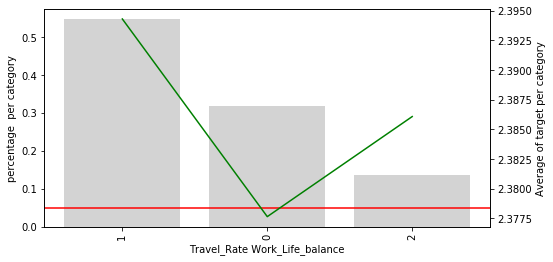

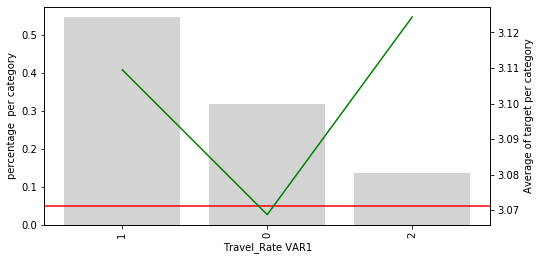

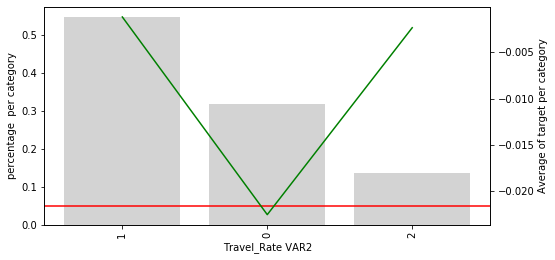

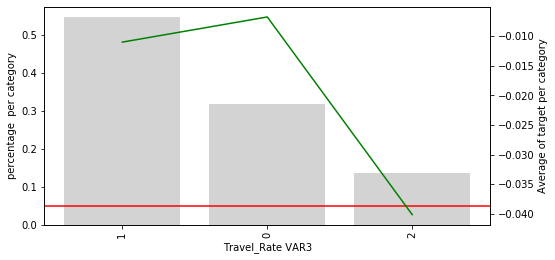

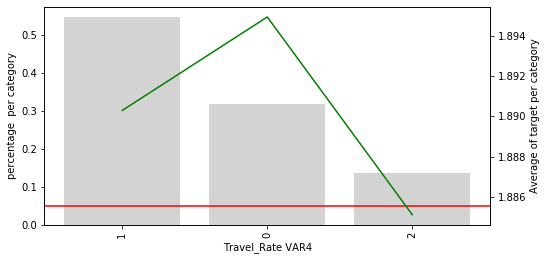

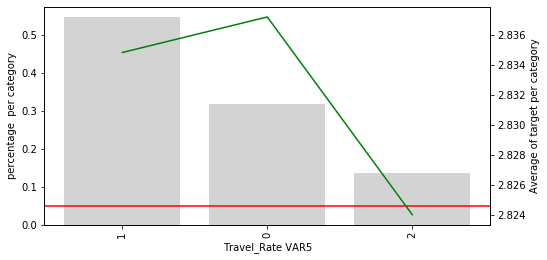

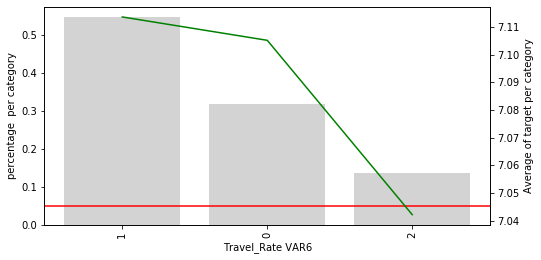

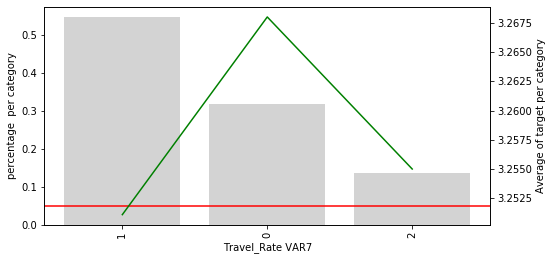

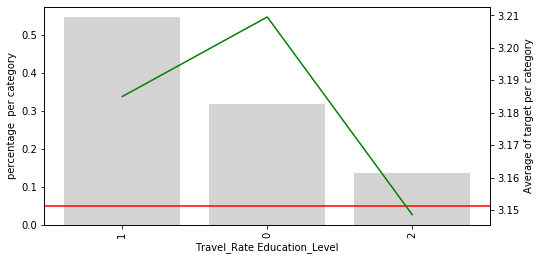

In [113]:
for  var in discrete:
    temp_df = calculate_mean_target_per_category(data,'Travel_Rate',var)
    plot_categories(temp_df, 'Travel_Rate',var)

In [114]:
discrete.append('Travel_Rate')
numerical.remove('Travel_Rate')

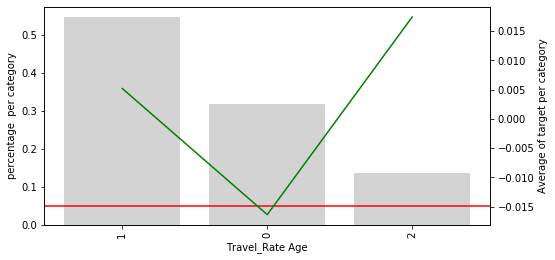

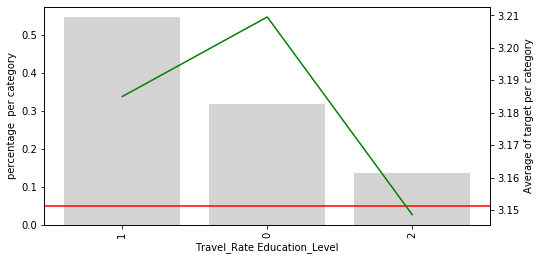

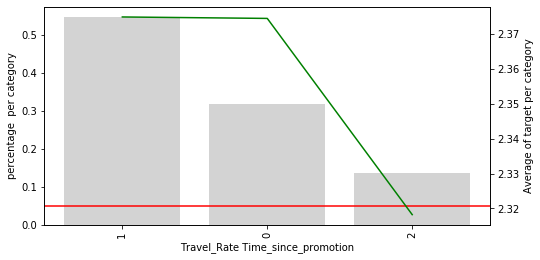

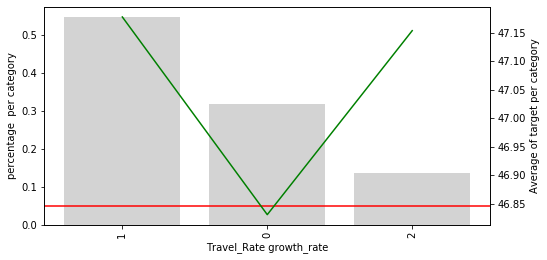

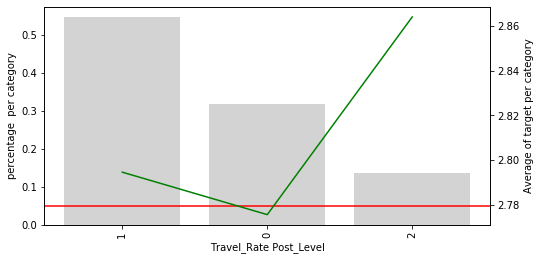

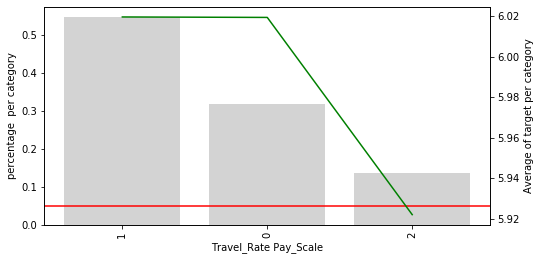

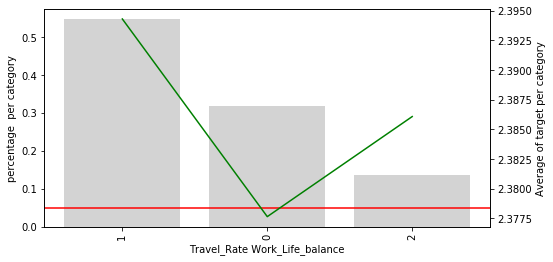

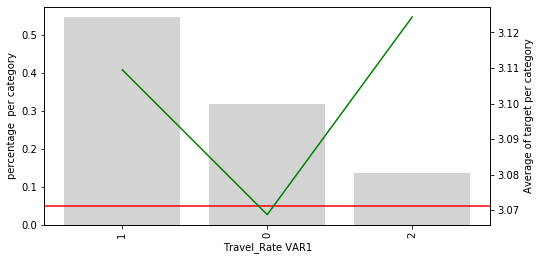

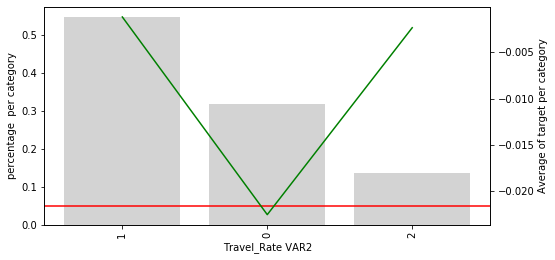

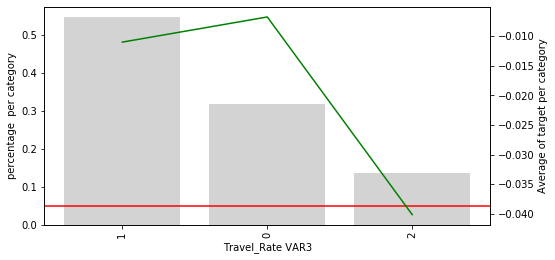

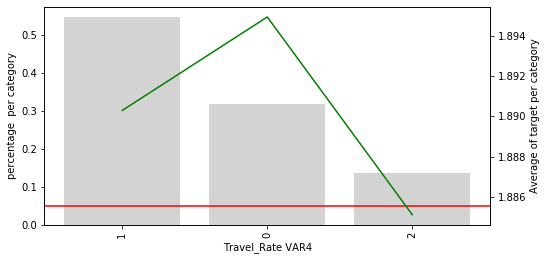

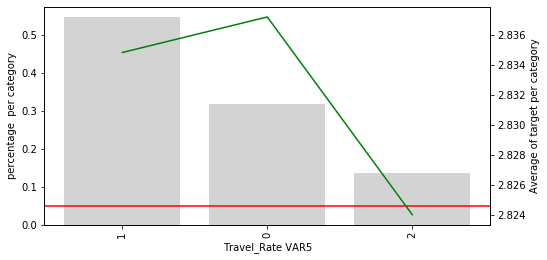

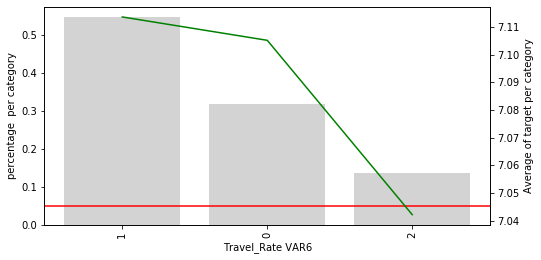

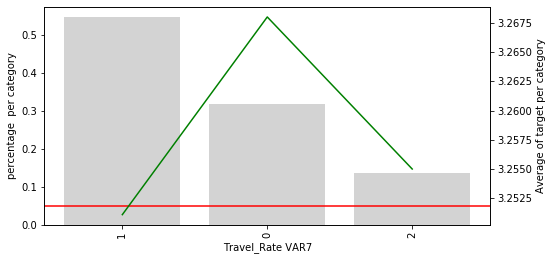

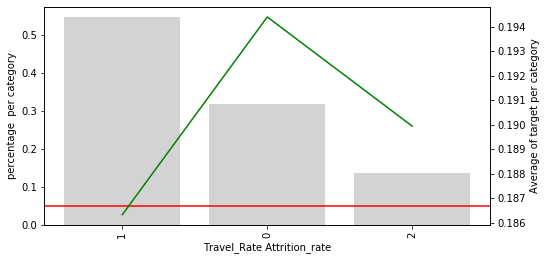

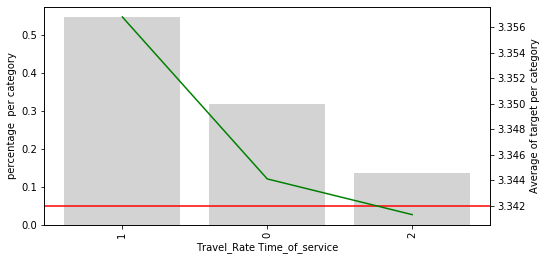

In [115]:
for  var in numerical:
    temp_df = calculate_mean_target_per_category(data,'Travel_Rate',var)
    plot_categories(temp_df, 'Travel_Rate',var)

In [116]:
data.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate',
       'Age_disc', 'Age_disc_bins', 'Attrition_rate_bins'],
      dtype='object')

__Post_Level__ 1) 2&3 have the highest ppl. 2) 5 have the highest rate 3) 

In [117]:
print(data.Post_Level.value_counts())
print(data.Post_Level.value_counts().sum())
data.Post_Level.nunique()

3    2435
2    1786
4    1046
1    1035
5     698
Name: Post_Level, dtype: int64
7000


5

In [118]:
discrete.remove('Post_Level')

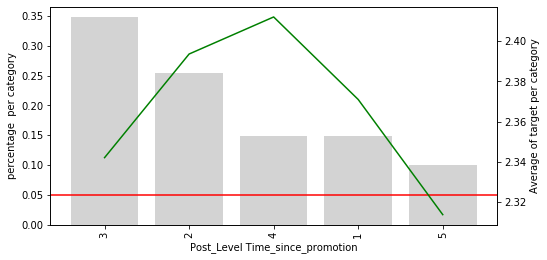

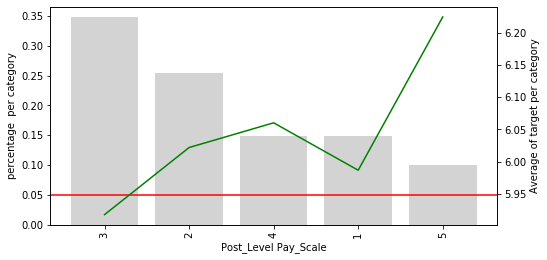

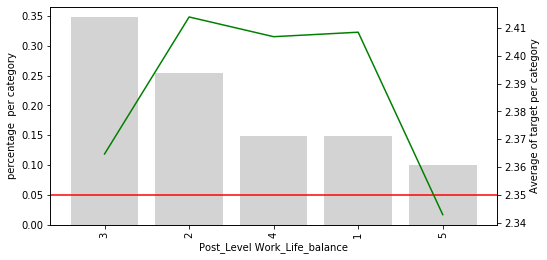

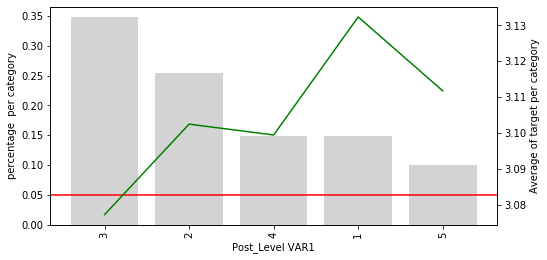

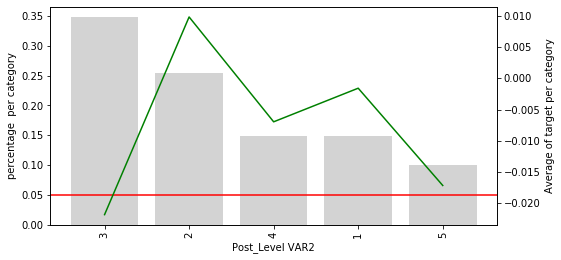

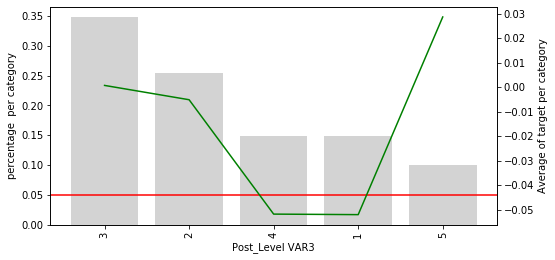

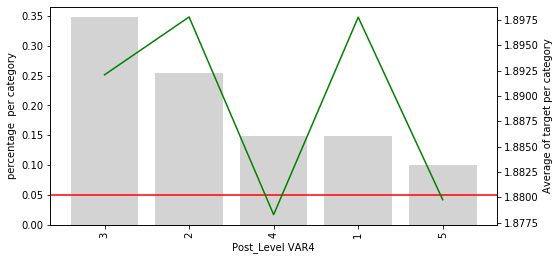

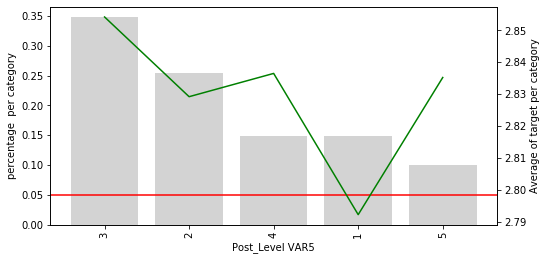

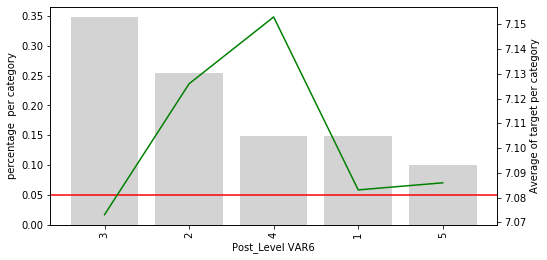

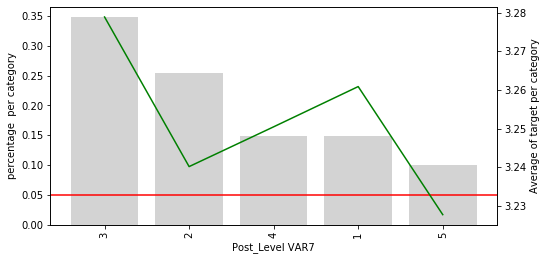

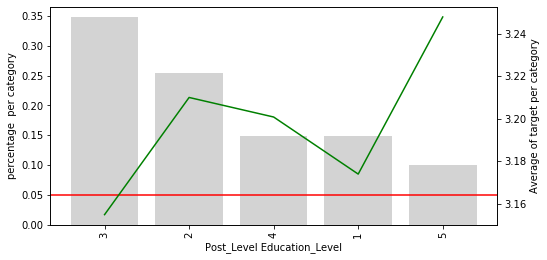

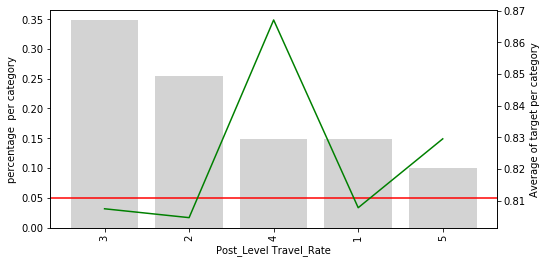

In [119]:
for  var in discrete:
    temp_df = calculate_mean_target_per_category(data,'Post_Level',var)
    plot_categories(temp_df, 'Post_Level',var)

In [120]:
discrete.append('Post_Level')
numerical.remove('Post_Level')

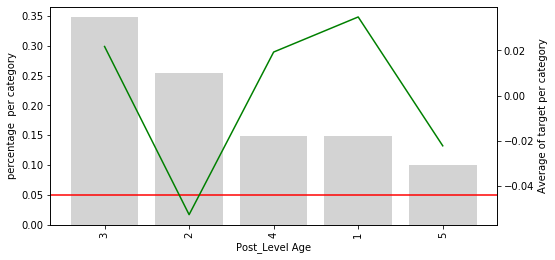

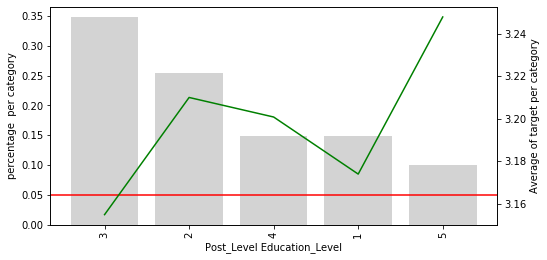

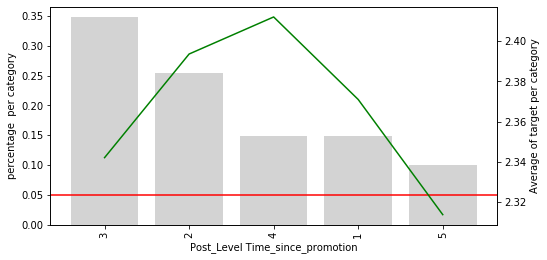

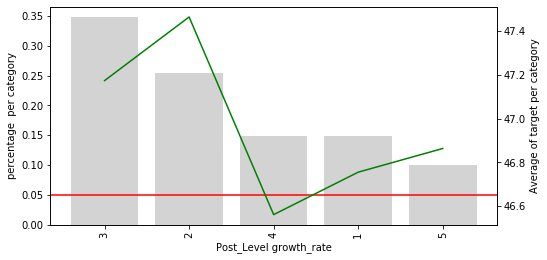

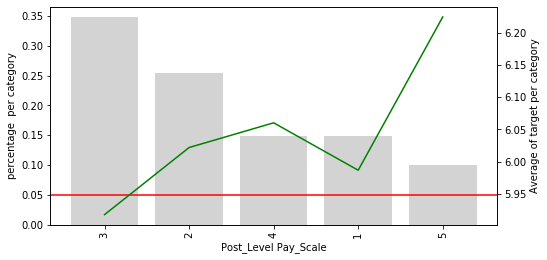

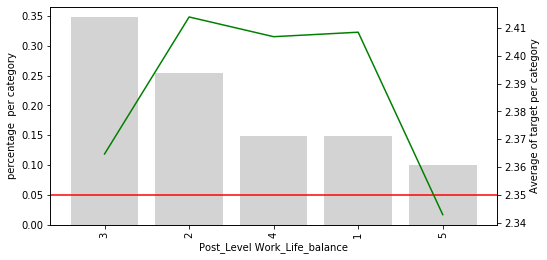

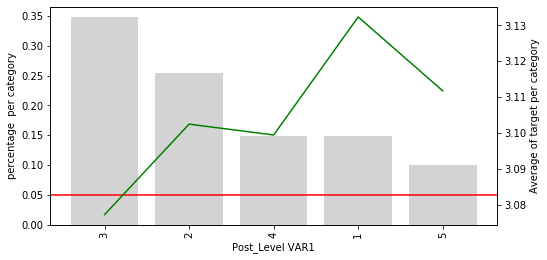

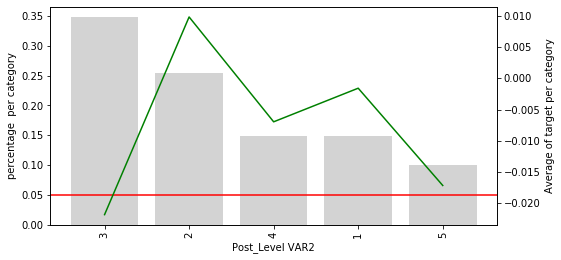

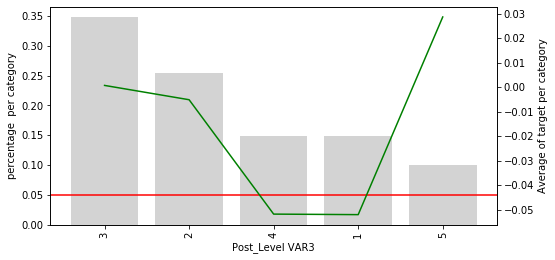

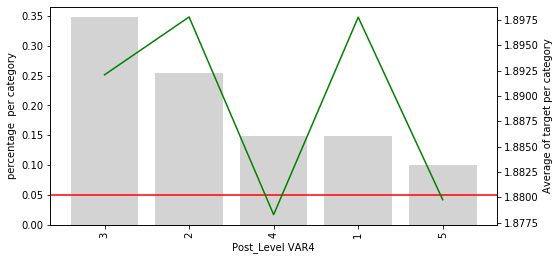

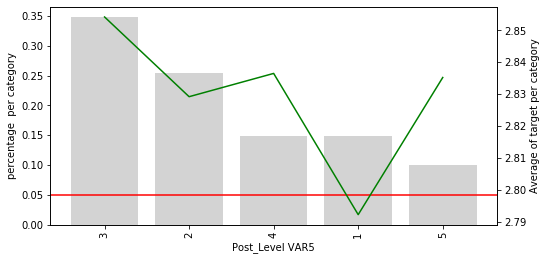

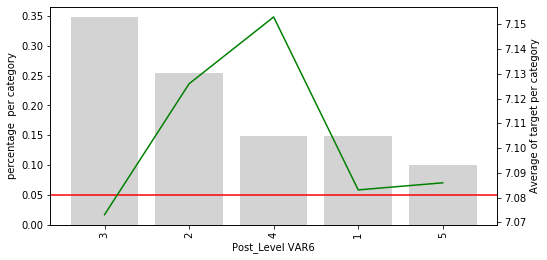

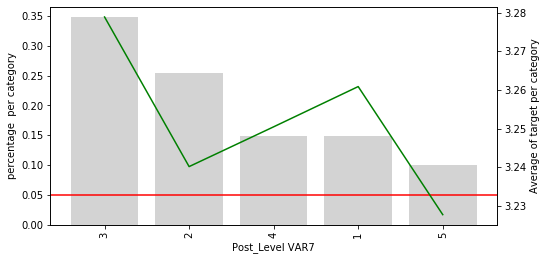

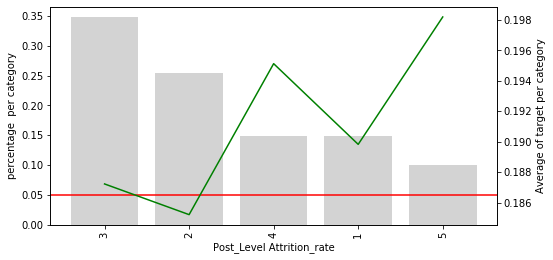

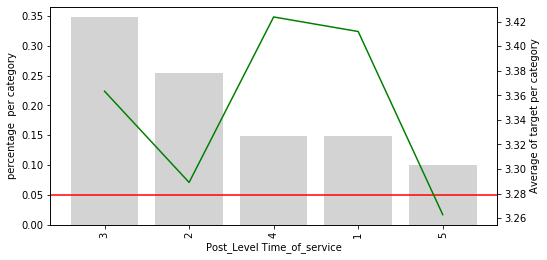

In [121]:
for  var in numerical:
    temp_df = calculate_mean_target_per_category(data,'Post_Level',var)
    plot_categories(temp_df, 'Post_Level',var)

In [122]:
data.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate',
       'Age_disc', 'Age_disc_bins', 'Attrition_rate_bins'],
      dtype='object')

__Pay_Scale__

In [123]:
print(data.Pay_Scale.value_counts())
print(data.Pay_Scale.isnull().sum())
data.Pay_Scale.nunique()

8.0     1392
6.0     1284
5.0     1160
4.0      983
7.0      811
9.0      464
2.0      277
3.0      255
10.0     209
1.0      156
Name: Pay_Scale, dtype: int64
9


10

In [124]:
onehotencoding.remove('Time_since_promotion')
discrete.remove('Pay_Scale')
continuous

['Age', 'Time_of_service', 'growth_rate', 'Attrition_rate']

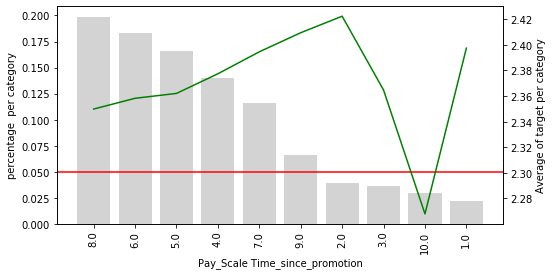

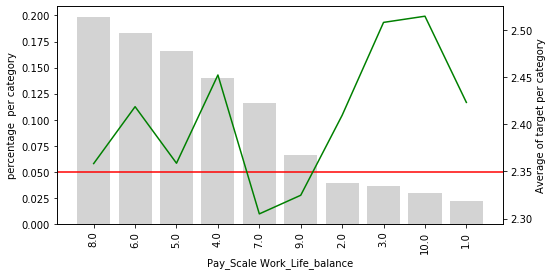

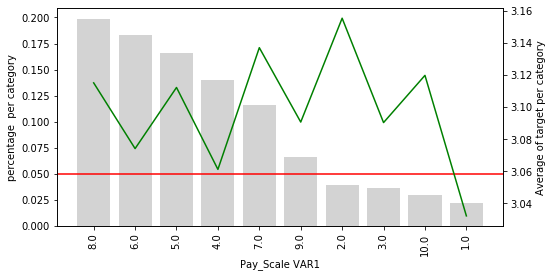

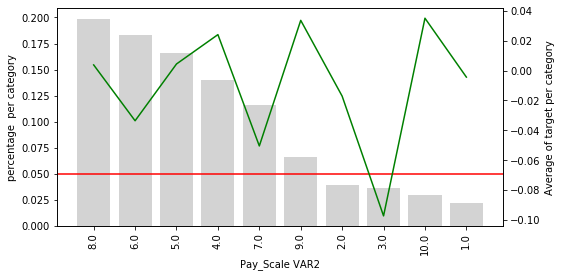

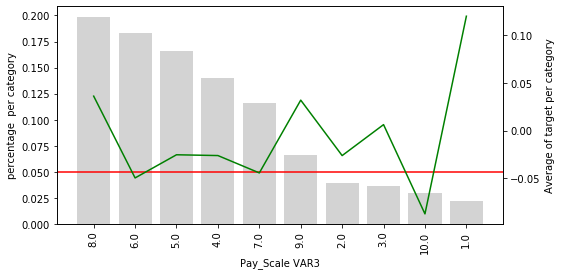

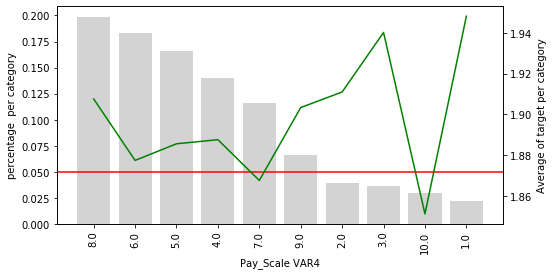

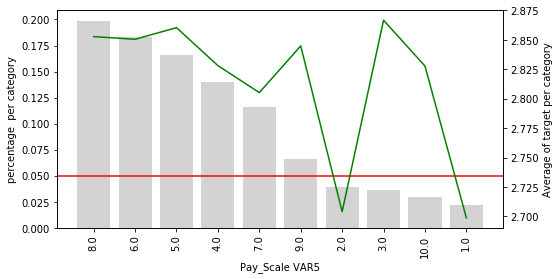

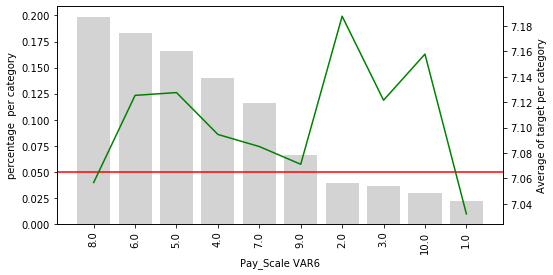

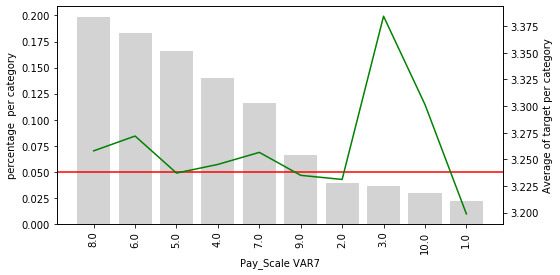

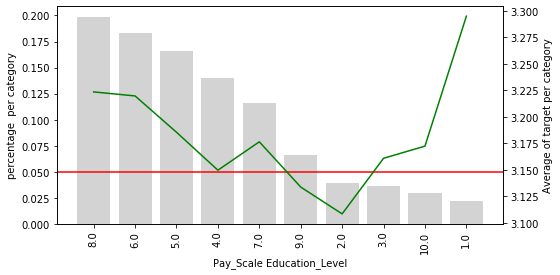

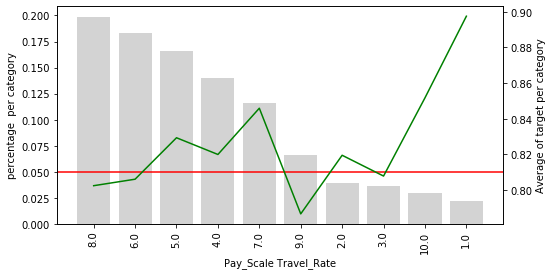

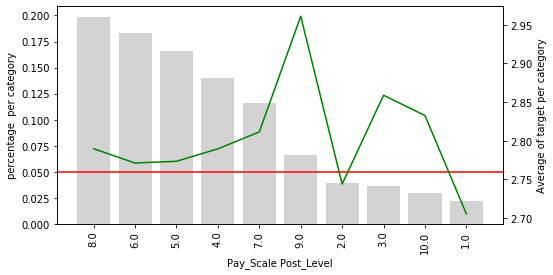

In [125]:
for  var in discrete:
    temp_df = calculate_mean_target_per_category(data,'Pay_Scale',var)
    plot_categories(temp_df, 'Pay_Scale',var)

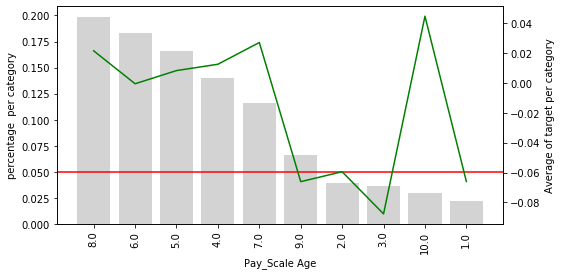

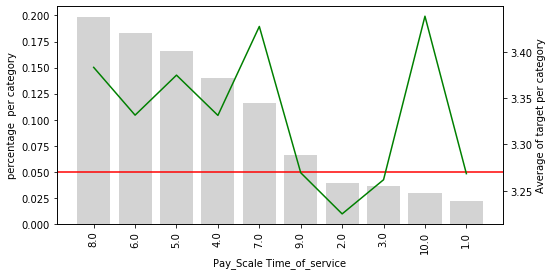

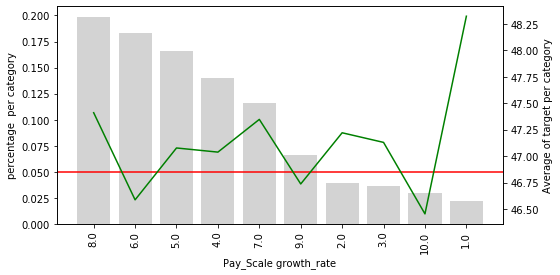

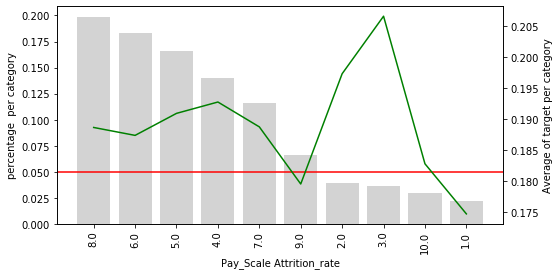

In [126]:
for  var in continuous:
    temp_df = calculate_mean_target_per_category(data,'Pay_Scale',var)
    plot_categories(temp_df, 'Pay_Scale',var)

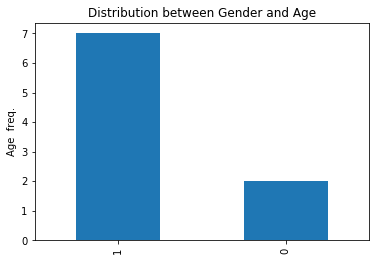

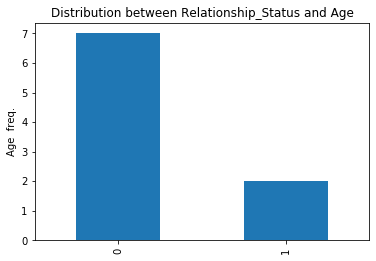

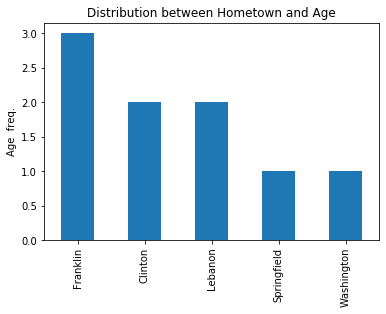

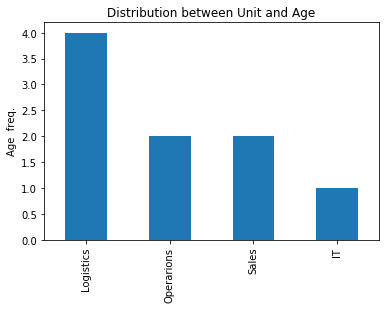

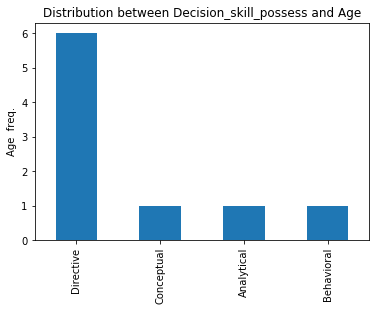

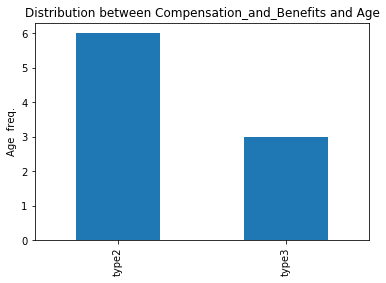

In [127]:
temp =data[data['Pay_Scale'].isnull()==True]
for var in categorical:
    
    fig = plt.figure()
    tmp=temp[var].value_counts()
    fig = tmp.plot.bar()
    fig.set_title('Distribution between {} and Age'.format(var))
    fig.set_ylabel('Age  freq.')
    plt.show()

In [128]:
data['Pay_Scale']= impute_na(data,'Pay_Scale',int(data[data['Gender']==0]['Pay_Scale'].mean()))
test['Pay_Scale']= impute_na(test,'Pay_Scale',int(data[data['Gender']==0]['Pay_Scale'].mean()))

In [129]:
data.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate',
       'Age_disc', 'Age_disc_bins', 'Attrition_rate_bins'],
      dtype='object')

__Compensation_and_Benefits__   1) can encode this as ordinal by notcing realtionship from graphs. 2) type 0 willl be high.

In [130]:
print(data.Compensation_and_Benefits.value_counts())
print(data.Compensation_and_Benefits.value_counts().sum())
data.Compensation_and_Benefits.nunique()

type2    3945
type3    2382
type4     353
type0     187
type1     133
Name: Compensation_and_Benefits, dtype: int64
7000


5

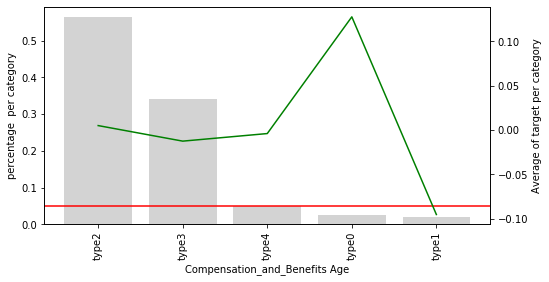

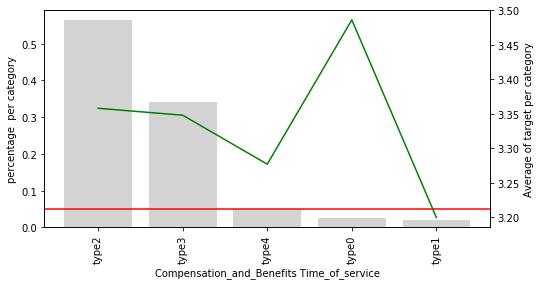

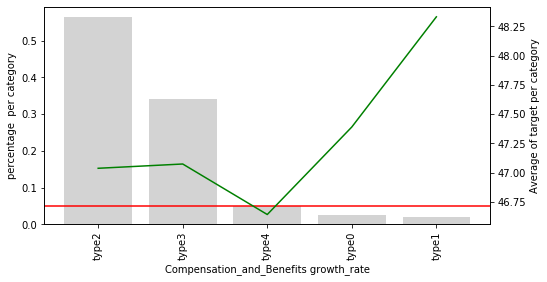

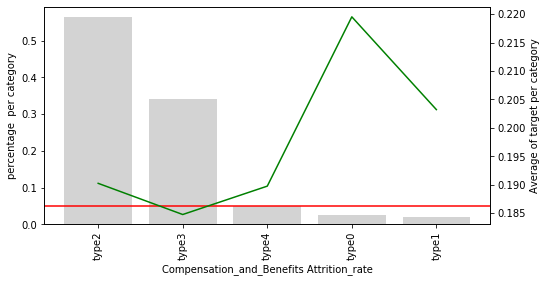

In [131]:
for  var in continuous:
    temp_df = calculate_mean_target_per_category(data,'Compensation_and_Benefits',var)
    plot_categories(temp_df, 'Compensation_and_Benefits',var)

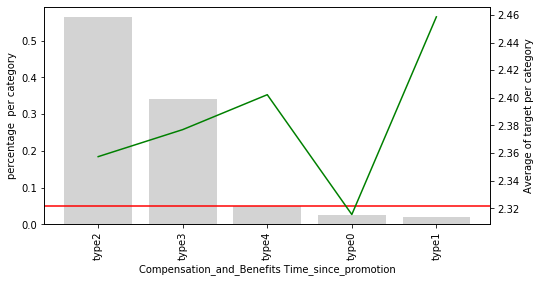

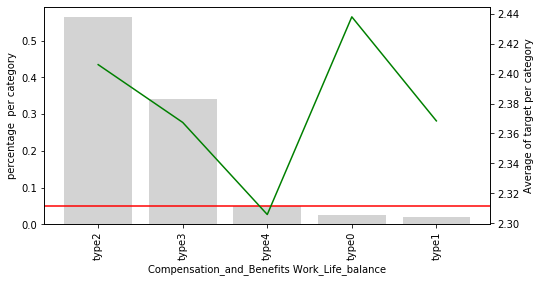

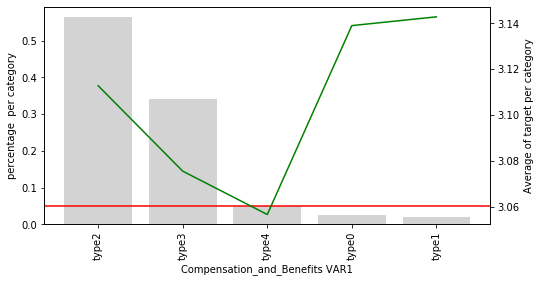

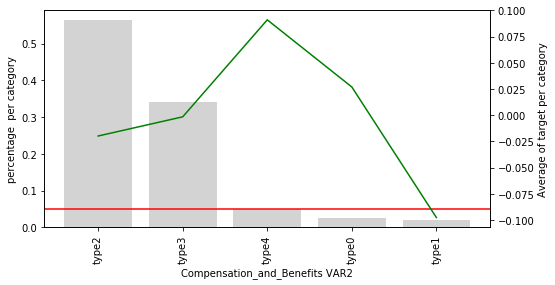

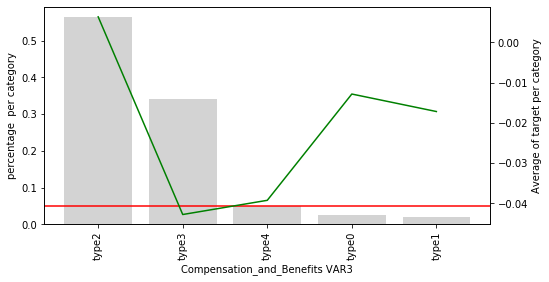

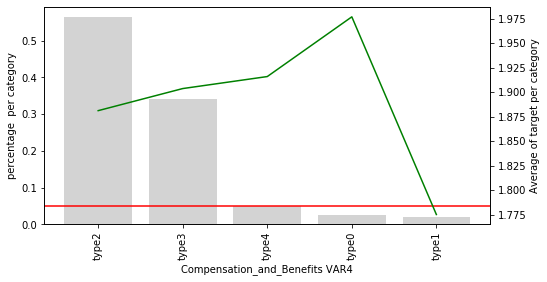

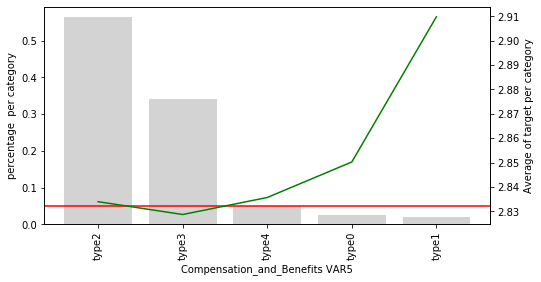

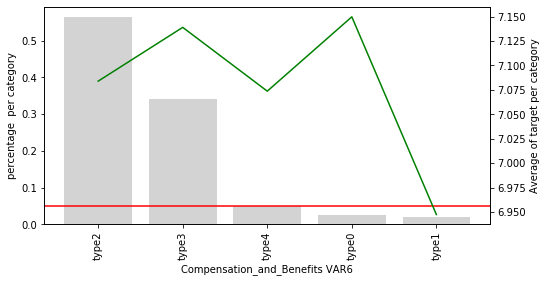

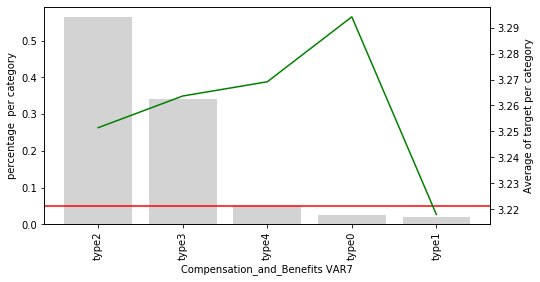

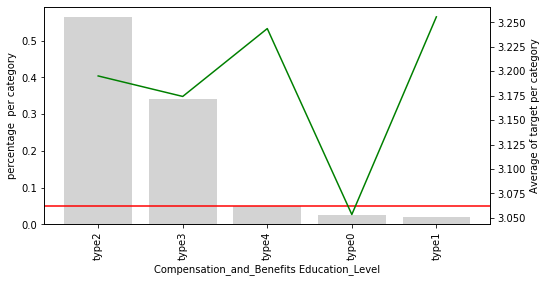

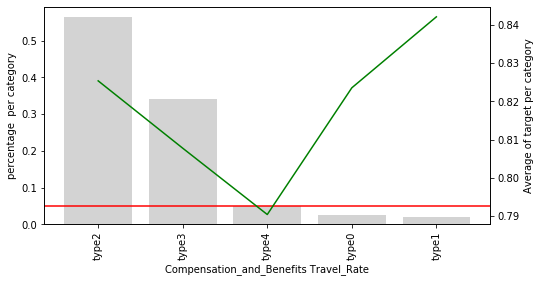

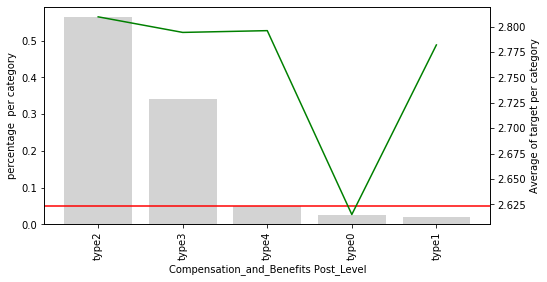

In [132]:
for  var in discrete:
    temp_df = calculate_mean_target_per_category(data,'Compensation_and_Benefits',var)
    plot_categories(temp_df, 'Compensation_and_Benefits',var)

In [133]:
onehotencoding.append('Compensation_and_Benefits')

In [134]:
data.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate',
       'Age_disc', 'Age_disc_bins', 'Attrition_rate_bins'],
      dtype='object')

__Work_Life_balance__

In [135]:
print(data.Work_Life_balance.value_counts())
print(data.Work_Life_balance.value_counts().sum())
data.Work_Life_balance.nunique()

1.0    2042
3.0    2023
2.0    1615
4.0    1197
5.0     112
Name: Work_Life_balance, dtype: int64
6989


5

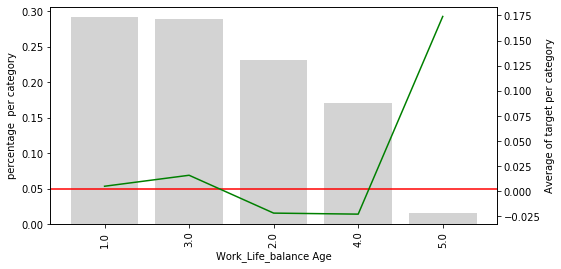

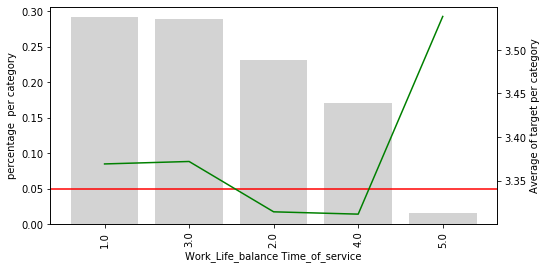

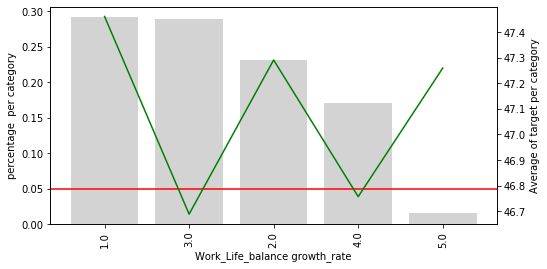

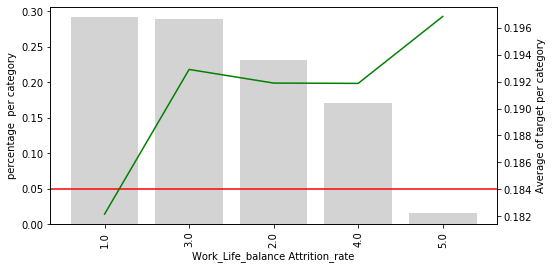

In [136]:
for  var in continuous:
    temp_df = calculate_mean_target_per_category(data,'Work_Life_balance',var)
    plot_categories(temp_df, 'Work_Life_balance',var)

In [137]:
discrete.remove('Work_Life_balance')

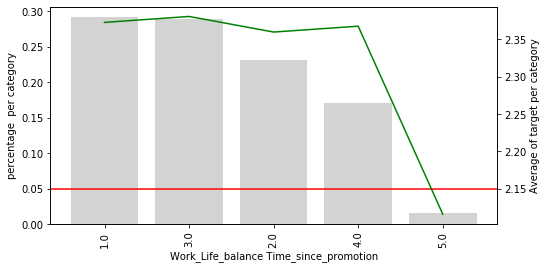

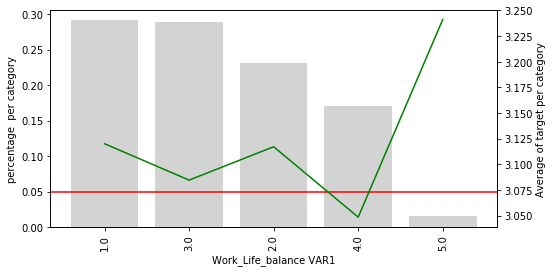

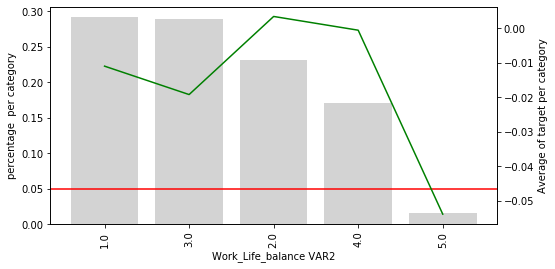

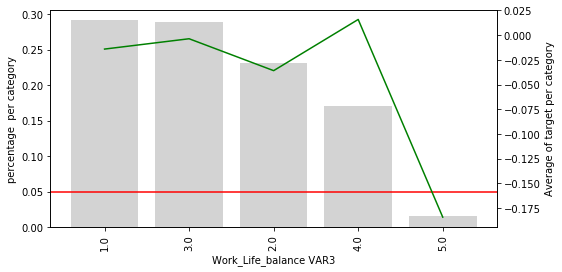

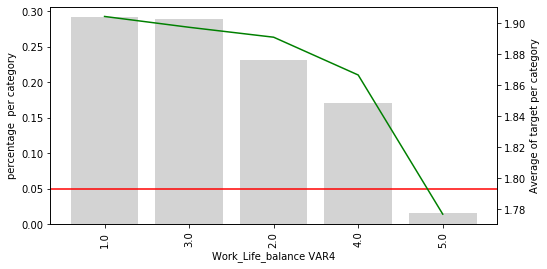

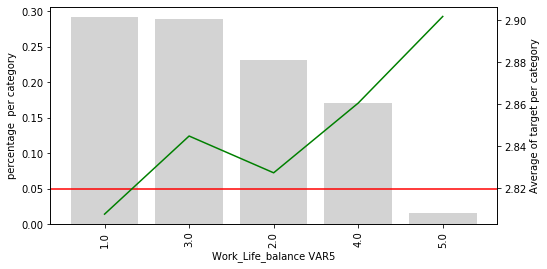

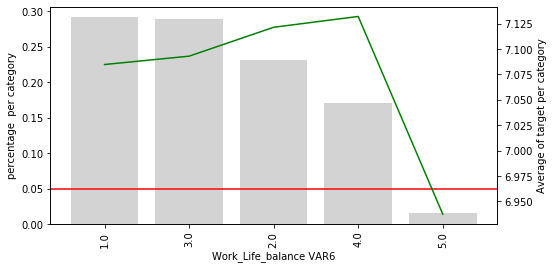

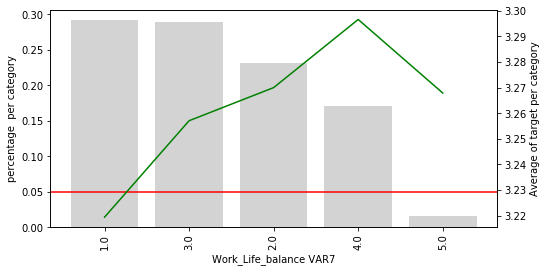

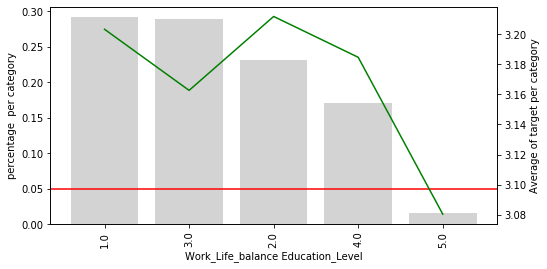

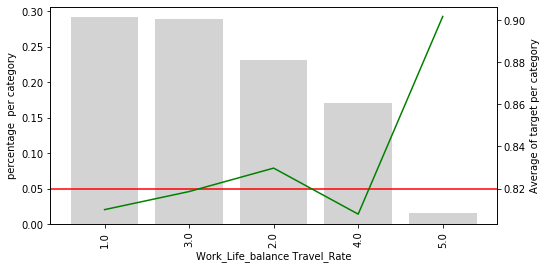

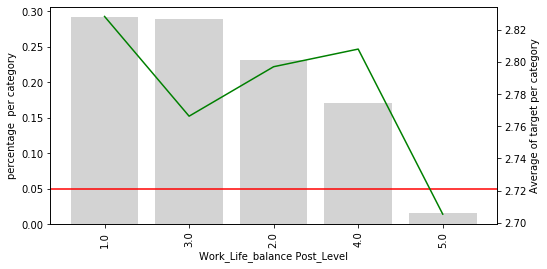

In [138]:
for  var in discrete:
    temp_df = calculate_mean_target_per_category(data,'Work_Life_balance',var)
    plot_categories(temp_df, 'Work_Life_balance',var)

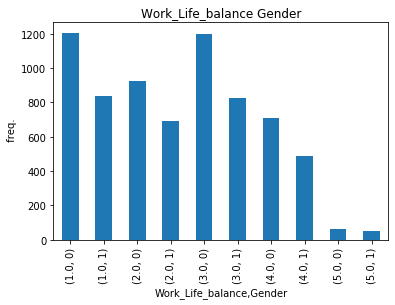

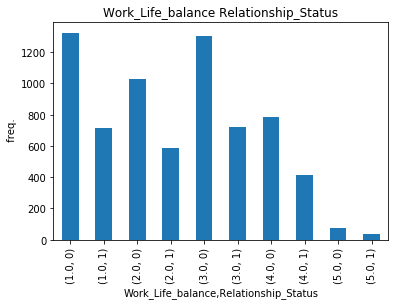

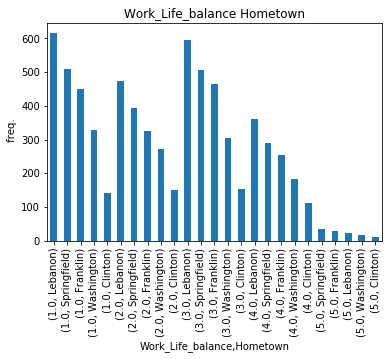

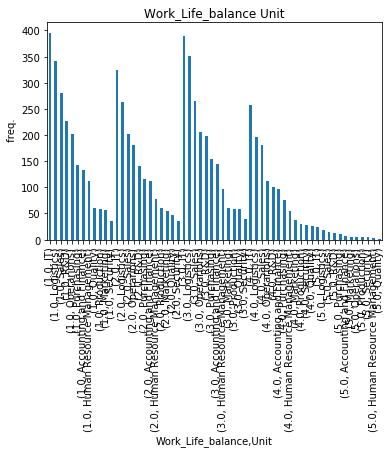

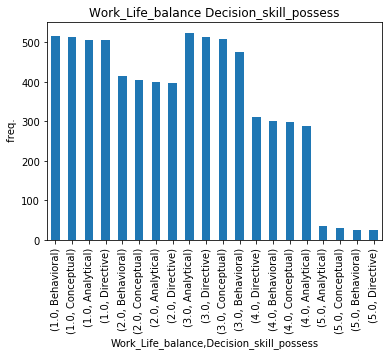

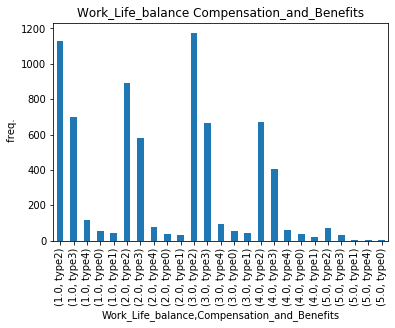

In [139]:
for var  in categorical:
    category_wise_perc('Work_Life_balance',var)

In [140]:
temp =data[data['Work_Life_balance'].isnull()==True]

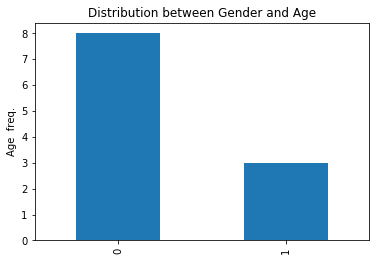

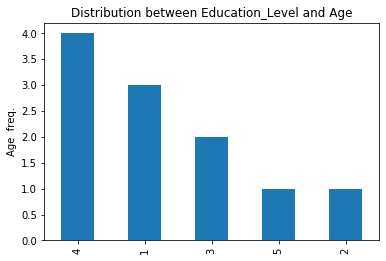

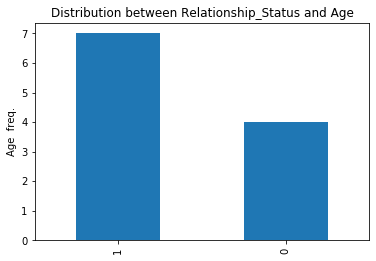

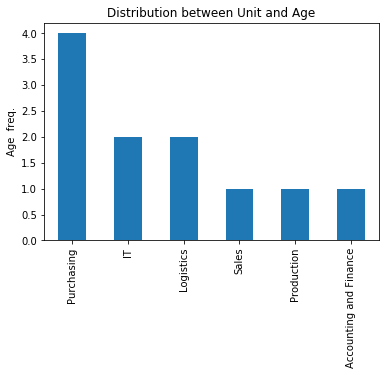

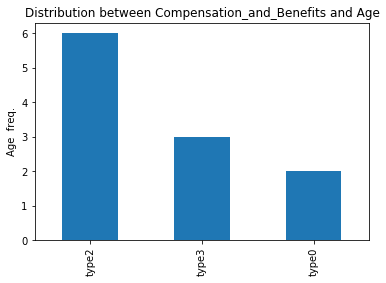

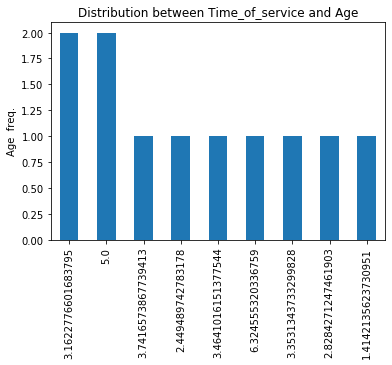

In [141]:
for var in ['Gender', 'Education_Level', 'Relationship_Status','Unit','Compensation_and_Benefits','Time_of_service']:
    
    fig = plt.figure()
    tmp=temp[var].value_counts()
    fig = tmp.plot.bar()
    fig.set_title('Distribution between {} and Age'.format(var))
    fig.set_ylabel('Age  freq.')
    plt.show()

In [142]:
data['Work_Life_balance']= impute_na(data,'Work_Life_balance',int(data[data['Gender']==0]['Work_Life_balance'].mean()))
test['Work_Life_balance']= impute_na(test,'Work_Life_balance',int(data[data['Gender']==0]['Work_Life_balance'].mean()))

In [143]:
data.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate',
       'Age_disc', 'Age_disc_bins', 'Attrition_rate_bins'],
      dtype='object')

#### all VAR 
1) 5&1 ko rare m dala jaskta h in var1.

In [144]:
l=[i for i in data.columns if i[0:3]=='VAR']
l

['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']

In [145]:
for i in l:
    print( i + ' '+ str(data[i].isnull().sum()))

VAR1 0
VAR2 577
VAR3 0
VAR4 656
VAR5 0
VAR6 0
VAR7 0


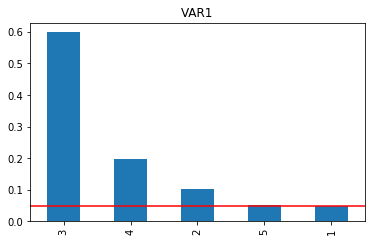

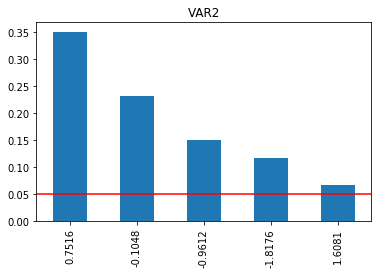

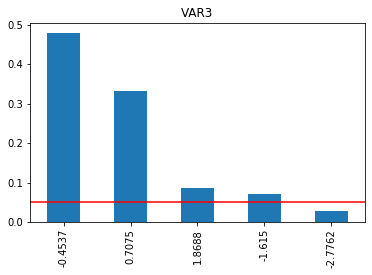

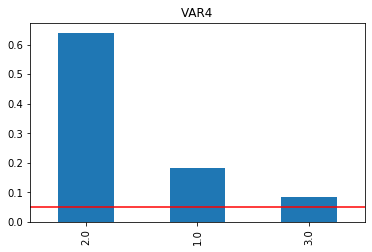

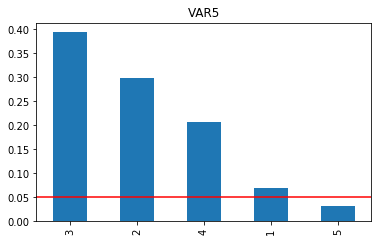

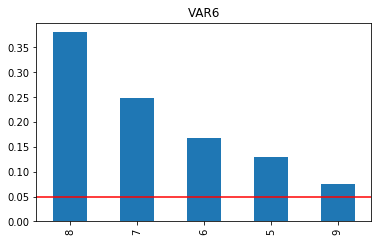

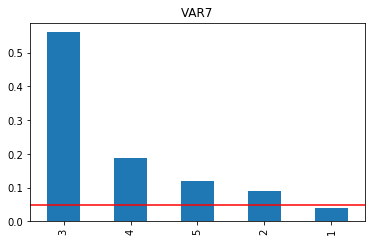

In [146]:
list_hist(l,30)

In [147]:
for i in l:
    if i in discrete:
        discrete.remove(i)
discrete

['Time_since_promotion', 'Education_Level', 'Travel_Rate', 'Post_Level']

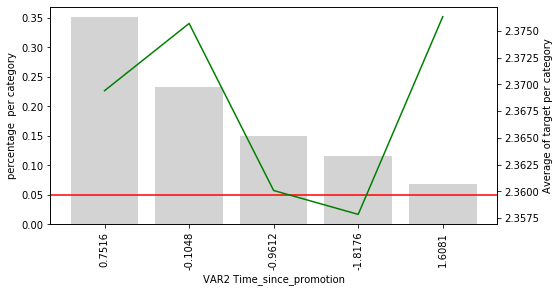

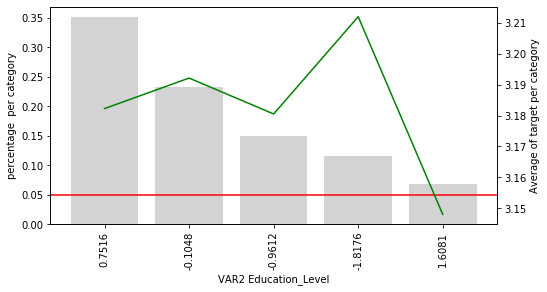

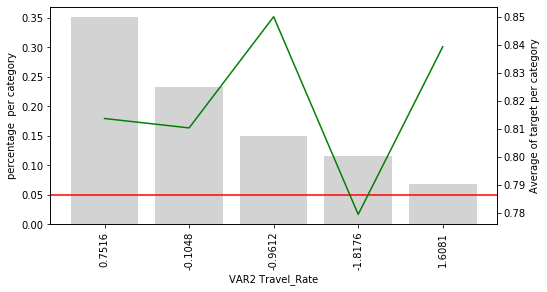

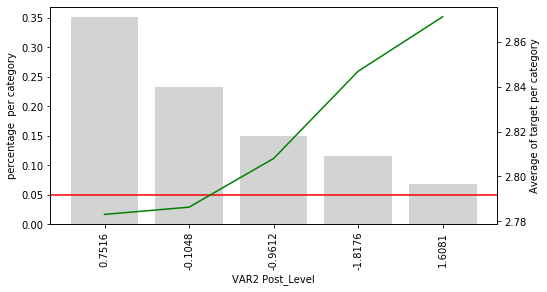

In [148]:
for  var in discrete:
    temp_df = calculate_mean_target_per_category(data,'VAR2',var)
    plot_categories(temp_df, 'VAR2',var)

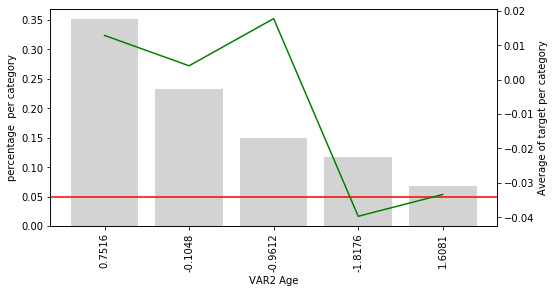

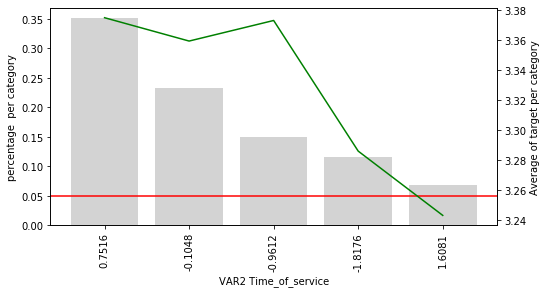

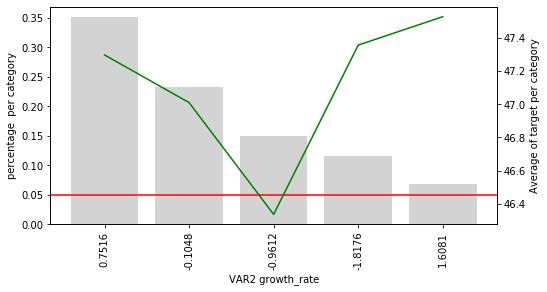

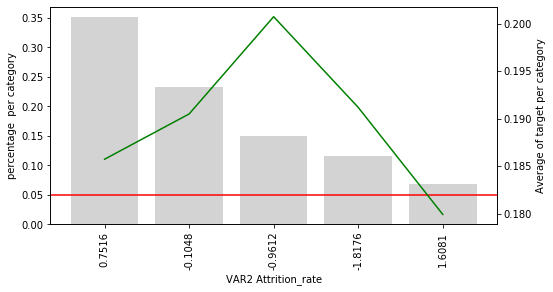

In [149]:
for  var in continuous:
    temp_df = calculate_mean_target_per_category(data,'VAR2',var)
    plot_categories(temp_df, 'VAR2',var)

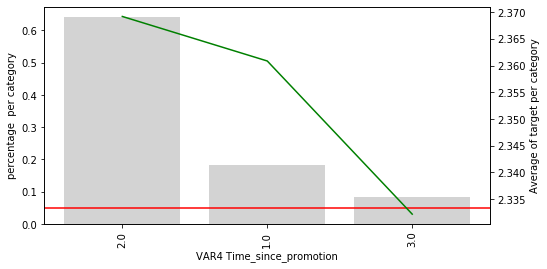

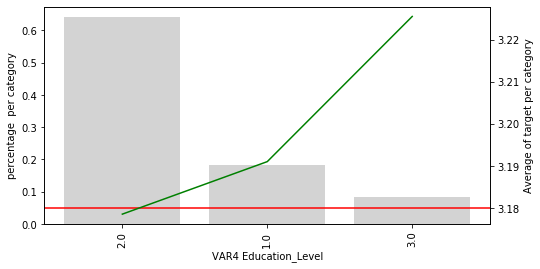

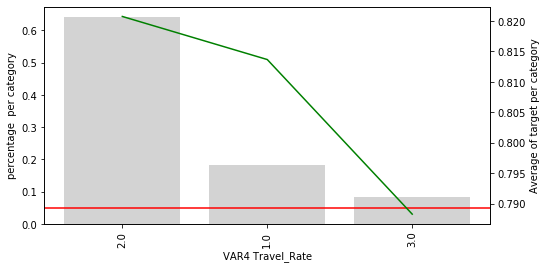

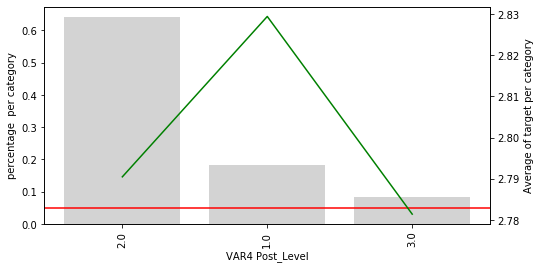

In [150]:
for  var in discrete:
    temp_df = calculate_mean_target_per_category(data,'VAR4',var)
    plot_categories(temp_df, 'VAR4',var)

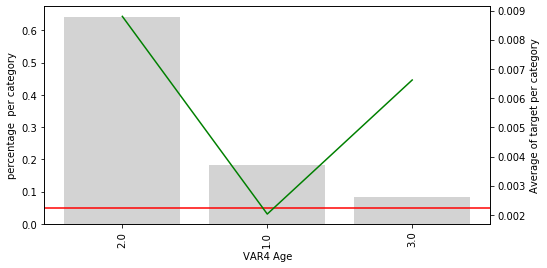

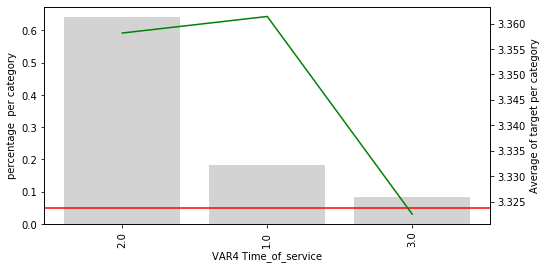

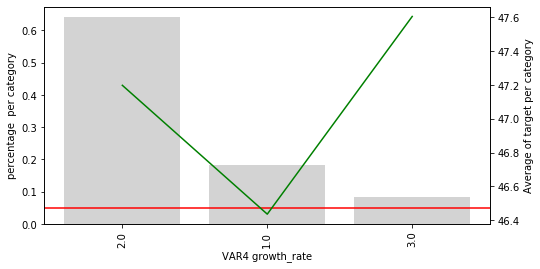

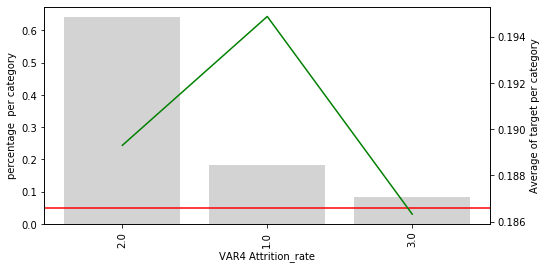

In [151]:
for  var in continuous:
    temp_df = calculate_mean_target_per_category(data,'VAR4',var)
    plot_categories(temp_df, 'VAR4',var)

In [152]:
data.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate',
       'Age_disc', 'Age_disc_bins', 'Attrition_rate_bins'],
      dtype='object')

In [153]:
temp2 =data[data['VAR2'].isnull()==True]

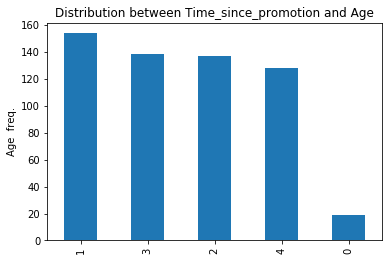

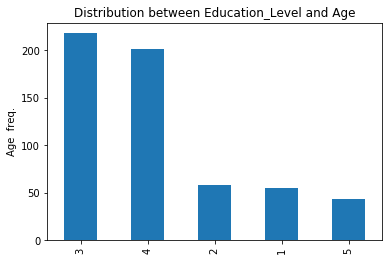

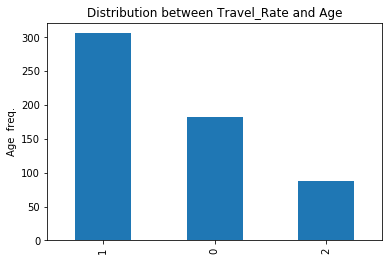

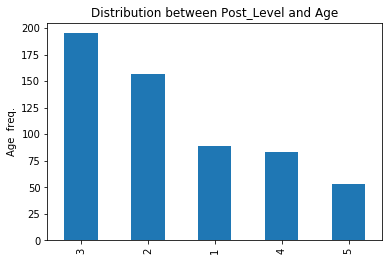

In [154]:
for var in discrete:
    
    fig = plt.figure()
    tmp=temp2[var].value_counts()
    fig = tmp.plot.bar()
    fig.set_title('Distribution between {} and Age'.format(var))
    fig.set_ylabel('Age  freq.')
    plt.show()

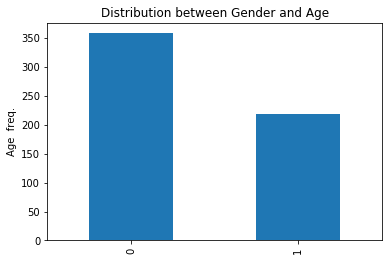

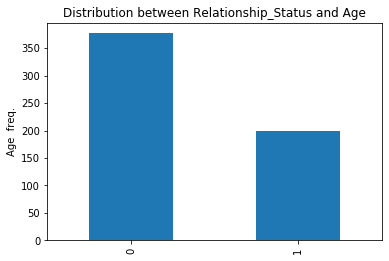

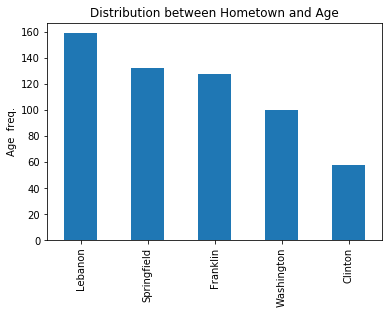

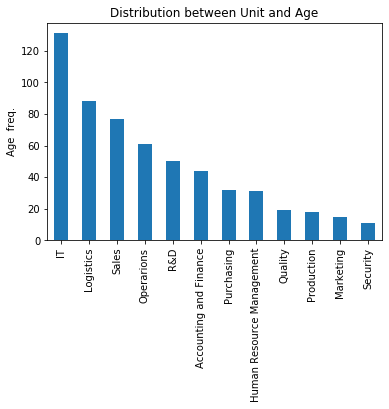

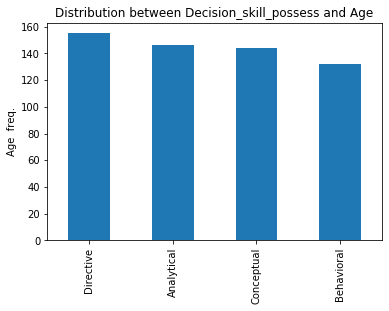

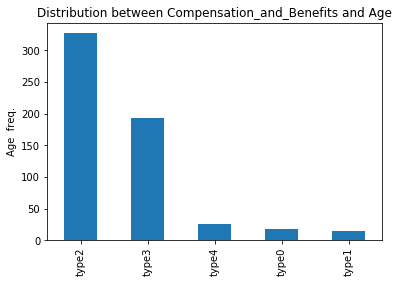

In [155]:
for var in categorical:
    
    fig = plt.figure()
    tmp=temp2[var].value_counts()
    fig = tmp.plot.bar()
    fig.set_title('Distribution between {} and Age'.format(var))
    fig.set_ylabel('Age  freq.')
    plt.show()

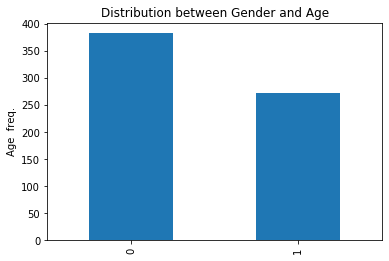

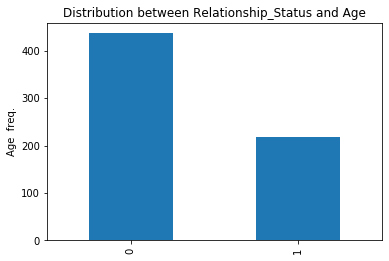

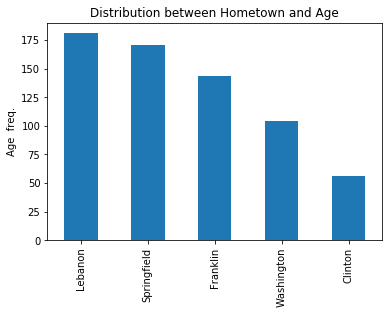

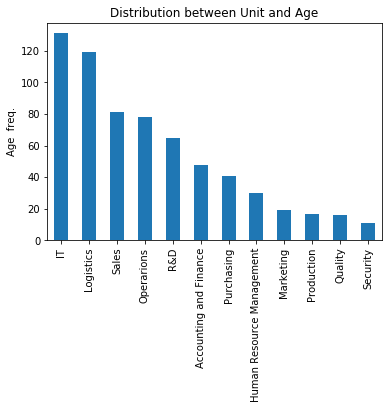

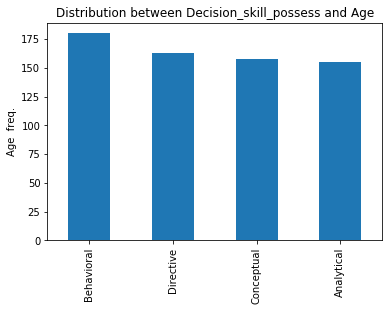

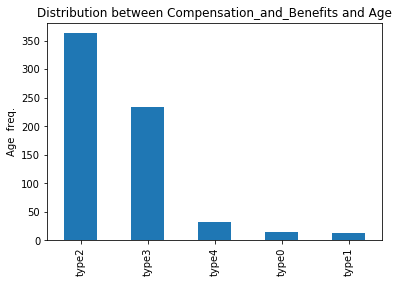

In [156]:
temp4 =data[data['VAR4'].isnull()==True]
for var in categorical:
    
    fig = plt.figure()
    tmp=temp4[var].value_counts()
    fig = tmp.plot.bar()
    fig.set_title('Distribution between {} and Age'.format(var))
    fig.set_ylabel('Age  freq.')
    plt.show()

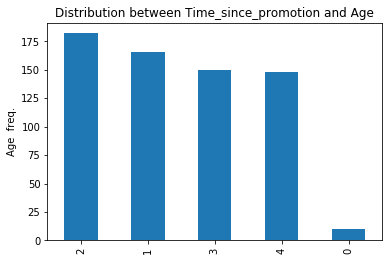

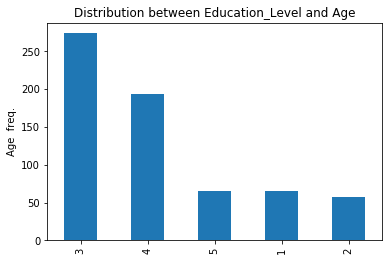

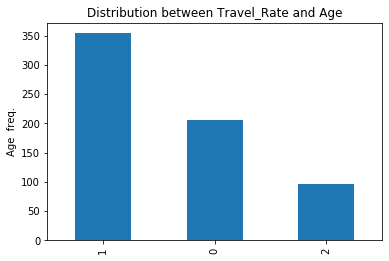

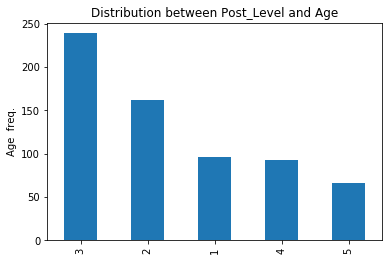

In [157]:
for var in discrete:
    
    fig = plt.figure()
    tmp=temp4[var].value_counts()
    fig = tmp.plot.bar()
    fig.set_title('Distribution between {} and Age'.format(var))
    fig.set_ylabel('Age  freq.')
    plt.show()

In [158]:
print(data[data['Compensation_and_Benefits']=='type2']['VAR2'].mode())
data['VAR2']= impute_na(data,'VAR2',.7516)
test['VAR2']= impute_na(test,'VAR2',.7516)

0    0.7516
dtype: float64


In [159]:
print(data[data['Compensation_and_Benefits']=='type2']['VAR4'].mode())
data['VAR4']= impute_na(data,'VAR4',2.0)
test['VAR4']= impute_na(test,'VAR4',2.0)

0    2.0
dtype: float64


In [160]:
data.drop(['Age_disc', 'Age_disc_bins' ,'Attrition_rate_bins'],axis=1,inplace=True)
test.drop(['Age_disc', 'Age_disc_bins' ],axis=1,inplace=True)


In [161]:
data.head()

Gender       Age  Education_Level  Relationship_Status     Hometown  \
0       0  0.191585                4                    0     Franklin   
1       1 -1.170623                3                    1  Springfield   
2       0  1.402436                3                    0      Clinton   
3       0 -1.019267                3                    1      Lebanon   
4       0 -0.640876                1                    0  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual         2.000000   
1                  Logistics             Analytical         2.236068   
2                    Quality             Conceptual         5.196152   
3  Human Resource Management             Behavioral         2.000000   
4                  Logistics             Conceptual         2.236068   

   Time_since_promotion  growth_rate  ...  Compensation_and_Benefits  \
0                     4           33  ...                      type2   
1                     4           36  ...                      type2   
2                     3           51  ...                      type2   
3                     3           56  ...                      type2   
4                     4           62  ...                      type3   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                3.0     4  0.7516  1.8688   2.0     4     5     3   
1                4.0     3 -0.9612 -0.4537   2.0     3     5     3   
2                1.0     4 -0.9612 -0.4537   3.0     3     8     3   
3                1.0     3 -1.8176 -0.4537   2.0     3     7     3   
4                3.0     1  0.7516 -0.4537   2.0     2     8     2   

   Attrition_rate  
0          0.1841  
1          0.0670  
2          0.0851  
3          0.0668  
4          0.1827  

[5 rows x 23 columns]

# Feature extarction

In [162]:
data.head()

Gender       Age  Education_Level  Relationship_Status     Hometown  \
0       0  0.191585                4                    0     Franklin   
1       1 -1.170623                3                    1  Springfield   
2       0  1.402436                3                    0      Clinton   
3       0 -1.019267                3                    1      Lebanon   
4       0 -0.640876                1                    0  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual         2.000000   
1                  Logistics             Analytical         2.236068   
2                    Quality             Conceptual         5.196152   
3  Human Resource Management             Behavioral         2.000000   
4                  Logistics             Conceptual         2.236068   

   Time_since_promotion  growth_rate  ...  Compensation_and_Benefits  \
0                     4           33  ...                      type2   
1                     4           36  ...                      type2   
2                     3           51  ...                      type2   
3                     3           56  ...                      type2   
4                     4           62  ...                      type3   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                3.0     4  0.7516  1.8688   2.0     4     5     3   
1                4.0     3 -0.9612 -0.4537   2.0     3     5     3   
2                1.0     4 -0.9612 -0.4537   3.0     3     8     3   
3                1.0     3 -1.8176 -0.4537   2.0     3     7     3   
4                3.0     1  0.7516 -0.4537   2.0     2     8     2   

   Attrition_rate  
0          0.1841  
1          0.0670  
2          0.0851  
3          0.0668  
4          0.1827  

[5 rows x 23 columns]

In [374]:
test.head()

Gender       Age  Education_Level  Relationship_Status     Hometown  \
0       0 -0.565197                5                    1  Springfield   
1       1  1.932184                2                    1      Lebanon   
2       1  0.948367                3                    0  Springfield   
3       1  0.797011                5                    1   Washington   
4       0  0.342941                3                    0     Franklin   

        Unit Decision_skill_possess  Time_of_service  Time_since_promotion  \
0        R&D             Conceptual         2.645751                     4   
1         IT              Directive         6.403124                     2   
2      Sales              Directive         4.582576                     3   
3  Marketing             Analytical         3.316625                     4   
4        R&D             Conceptual         3.464102                     4   

   growth_rate  ...  Pay_Scale  Compensation_and_Benefits  Work_Life_balance  \
0           30  ...        4.0                      type2                1.0   
1           72  ...        1.0                      type2                1.0   
2           25  ...        8.0                      type3                1.0   
3           28  ...        2.0                      type0                4.0   
4           47  ...        2.0                      type2                4.0   

  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  
0    3 -0.9612 -0.4537   2.0     1     8     4  
1    4 -0.9612  0.7075   1.0     2     8     2  
2    4 -0.1048  0.7075   2.0     1     9     3  
3    3 -0.1048  0.7075   2.0     2     8     3  
4    4  1.6081  0.7075   2.0     2     7     4  

[5 rows x 22 columns]

# feature selection


In [217]:
correlated_features = set()
correlation_matrix = data.drop('Attrition_rate', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'Time_of_service'}

In [375]:
less_relevant=['VAR1',
 'VAR3',
 'Unit_Human Resource Management',
 'Unit_Production',
 'Unit_Sales',
 'Compensation_and_Benefits_type4']

In [376]:
testt=test.copy()
testt = pd.get_dummies(testt, columns=onehotencoding,drop_first=True)
testt.drop(less_relevant,axis=1,inplace=True)

In [377]:
data_encoded = pd.get_dummies(data, columns=onehotencoding,drop_first=True)
data_encoded.drop(less_relevant,axis=1,inplace=True)

In [378]:
less_relevant=[ i for i in less_relevant if i in data_encoded.columns]

In [379]:
data_encoded.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4', 'VAR5',
       'VAR6', 'VAR7', 'Attrition_rate', 'Unit_IT', 'Unit_Logistics',
       'Unit_Marketing', 'Unit_Operarions', 'Unit_Purchasing', 'Unit_Quality',
       'Unit_R&D', 'Unit_Security', 'Hometown_Franklin', 'Hometown_Lebanon',
       'Hometown_Springfield', 'Hometown_Washington',
       'Decision_skill_possess_Behavioral',
       'Decision_skill_possess_Conceptual', 'Decision_skill_possess_Directive',
       'Compensation_and_Benefits_type1', 'Compensation_and_Benefits_type2',
       'Compensation_and_Benefits_type3'],
      dtype='object')

In [380]:
testt.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4', 'VAR5',
       'VAR6', 'VAR7', 'Unit_IT', 'Unit_Logistics', 'Unit_Marketing',
       'Unit_Operarions', 'Unit_Purchasing', 'Unit_Quality', 'Unit_R&D',
       'Unit_Security', 'Hometown_Franklin', 'Hometown_Lebanon',
       'Hometown_Springfield', 'Hometown_Washington',
       'Decision_skill_possess_Behavioral',
       'Decision_skill_possess_Conceptual', 'Decision_skill_possess_Directive',
       'Compensation_and_Benefits_type1', 'Compensation_and_Benefits_type2',
       'Compensation_and_Benefits_type3'],
      dtype='object')

In [381]:
data_encoded.iloc[:,:16].head()

Gender       Age  Education_Level  Relationship_Status  Time_of_service  \
0       0  0.191585                4                    0         2.000000   
1       1 -1.170623                3                    1         2.236068   
2       0  1.402436                3                    0         5.196152   
3       0 -1.019267                3                    1         2.000000   
4       0 -0.640876                1                    0         2.236068   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                     4           33            1           1        7.0   
1                     4           36            0           3        6.0   
2                     3           51            0           2        8.0   
3                     3           56            1           3        8.0   
4                     4           62            1           3        2.0   

   Work_Life_balance    VAR2  VAR4  VAR5  VAR6  VAR7  
0                3.0  0.7516   2.0     4     5     3  
1                4.0 -0.9612   2.0     3     5     3  
2                1.0 -0.9612   3.0     3     8     3  
3                1.0 -1.8176   2.0     3     7     3  
4                3.0  0.7516   2.0     2     8     2

In [382]:
data_encoded_train= pd.concat([data_encoded.iloc[:,0:16] ,data_encoded.iloc[:,17: ]],axis=1)
print(data_encoded_train.shape)
data_encoded_train.columns

(7000, 34)


Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4', 'VAR5',
       'VAR6', 'VAR7', 'Unit_IT', 'Unit_Logistics', 'Unit_Marketing',
       'Unit_Operarions', 'Unit_Purchasing', 'Unit_Quality', 'Unit_R&D',
       'Unit_Security', 'Hometown_Franklin', 'Hometown_Lebanon',
       'Hometown_Springfield', 'Hometown_Washington',
       'Decision_skill_possess_Behavioral',
       'Decision_skill_possess_Conceptual', 'Decision_skill_possess_Directive',
       'Compensation_and_Benefits_type1', 'Compensation_and_Benefits_type2',
       'Compensation_and_Benefits_type3'],
      dtype='object')

In [384]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY= train_test_split(data_encoded_train,data_encoded.iloc[:,16],test_size=.2, random_state=0)
trainX.shape,testX.shape,trainY.shape,testY.shape


((5600, 34), (1400, 34), (5600,), (1400,))

In [258]:
trainY.head()

6137    0.0189
4778    0.5807
3149    0.1660
4638    0.2486
4110    0.1218
Name: Attrition_rate, dtype: float64

In [229]:
data_encoded.head()

Gender       Age  Education_Level  Relationship_Status  Time_of_service  \
0       0  0.191585                4                    0         2.000000   
1       1 -1.170623                3                    1         2.236068   
2       0  1.402436                3                    0         5.196152   
3       0 -1.019267                3                    1         2.000000   
4       0 -0.640876                1                    0         2.236068   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  ...  \
0                     4           33            1           1        7.0  ...   
1                     4           36            0           3        6.0  ...   
2                     3           51            0           2        8.0  ...   
3                     3           56            1           3        8.0  ...   
4                     4           62            1           3        2.0  ...   

   Hometown_Lebanon  Hometown_Springfield  Hometown_Washington  \
0                 0                     0                    0   
1                 0                     1                    0   
2                 0                     0                    0   
3                 1                     0                    0   
4                 0                     1                    0   

   Decision_skill_possess_Behavioral  Decision_skill_possess_Conceptual  \
0                                  0                                  1   
1                                  0                                  0   
2                                  0                                  1   
3                                  1                                  0   
4                                  0                                  1   

   Decision_skill_possess_Directive  Compensation_and_Benefits_type1  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Compensation_and_Benefits_type2  Compensation_and_Benefits_type3  \
0                                1                                0   
1                                1                                0   
2                                1                                0   
3                                1                                0   
4                                0                                1   

   Compensation_and_Benefits_type4  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 41 columns]

In [230]:
for i in testt.columns:
    if i not in trainX.columns:
        print(i)

In [231]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(trainX,trainY)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(trainX.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['feature','Score'] 
print(featureScores.nlargest(100,'Score'))  

                              feature     Score
12                               VAR2  9.457821
33  Decision_skill_possess_Behavioral  6.008300
0                              Gender  5.748661
19                            Unit_IT  4.933870
38    Compensation_and_Benefits_type3  4.189264
35   Decision_skill_possess_Directive  3.368725
8                          Post_Level  3.215245
31               Hometown_Springfield  2.448862
5                Time_since_promotion  2.420206
3                 Relationship_Status  2.399821
14                               VAR4  2.378832
34  Decision_skill_possess_Conceptual  2.342394
22                    Unit_Operarions  1.784982
2                     Education_Level  1.671266
30                   Hometown_Lebanon  1.534638
24                    Unit_Purchasing  1.532649
26                           Unit_R&D  1.409745
6                         growth_rate  1.380247
7                         Travel_Rate  1.139280
37    Compensation_and_Benefits_type2  0

In [268]:
less_relevant=[]
for i in range(len(featureScores.nlargest(100,'Score')['Score'])):
    if  featureScores.nlargest(100,'Score')['Score'][i] < .08:
        less_relevant.append(featureScores.nlargest(100,'Score')['feature'][i])

['Age',
 'Time_of_service',
 'VAR1',
 'VAR3',
 'VAR5',
 'VAR7',
 'Unit_Human Resource Management',
 'Unit_Logistics',
 'Unit_Marketing',
 'Unit_Production',
 'Unit_Sales',
 'Unit_Security',
 'Hometown_Washington',
 'Compensation_and_Benefits_type4']

In [177]:
trainX.columns

Index(['Gender', 'Education_Level', 'Relationship_Status', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Unit_IT', 'Unit_Logistics', 'Unit_Marketing',
       'Unit_Operarions', 'Unit_Purchasing', 'Unit_Quality', 'Unit_R&D',
       'Unit_Security', 'Hometown_Franklin', 'Hometown_Lebanon',
       'Hometown_Springfield', 'Hometown_Washington',
       'Decision_skill_possess_Behavioral',
       'Decision_skill_possess_Conceptual', 'Decision_skill_possess_Directive',
       'Compensation_and_Benefits_type1', 'Compensation_and_Benefits_type2',
       'Compensation_and_Benefits_type3', 'Compensation_and_Benefits_type4'],
      dtype='object')

# model


In [178]:
data.shape,testt.shape

((7000, 23), (3000, 34))

In [179]:
trainX.shape, trainY.shape,testX.shape,testY.shape,testt.shape

((5600, 34), (5600,), (1400, 34), (1400,), (3000, 34))

In [180]:
def calculate_score(pred):
    rms = sqrt(mean_squared_error(testY,pred))
    return 1- rms


In [385]:
trainX=np.array(trainX)
trainY=np.array(trainY)

In [386]:
testX=np.array(testX)
testt = np.array(testt)
testY=np.array(testY)

In [387]:
#Linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(trainX, trainY)
# reg.predict(testX)
calculate_score(reg.predict(testX))

0.8103473271760249

In [363]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(trainX, trainY)

calculate_score(regressor.predict(testX))
# rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
# rfecv.fit(X, target)

0.8011117779575885

In [344]:
#SVM

from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(trainX, trainY)

calculate_score(regressor.predict(testX))

0.8084647118781702

In [189]:
import tensorflow as tf

In [388]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


ann.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])

In [389]:
ann.fit(trainX, trainY, batch_size = 32, epochs = 20)
ann.predict(testX)

Train on 5600 samples
Epoch 1/20
5600/5600 [==============================] - 1s 211us/sample - loss: 0.0463 - accuracy: 7.1429e-04
Epoch 2/20
5600/5600 [==============================] - 1s 99us/sample - loss: 0.0408 - accuracy: 7.1429e-04
Epoch 3/20
5600/5600 [==============================] - 1s 136us/sample - loss: 0.0401 - accuracy: 7.1429e-04
Epoch 4/20
5600/5600 [==============================] - 1s 91us/sample - loss: 0.0396 - accuracy: 7.1429e-04
Epoch 5/20
5600/5600 [==============================] - 1s 100us/sample - loss: 0.0391 - accuracy: 7.1429e-04
Epoch 6/20
5600/5600 [==============================] - 1s 124us/sample - loss: 0.0387 - accuracy: 7.1429e-04
Epoch 7/20
5600/5600 [==============================] - 1s 144us/sample - loss: 0.0384 - accuracy: 7.1429e-04
Epoch 8/20
5600/5600 [==============================] - 1s 91us/sample - loss: 0.0379 - accuracy: 7.1429e-04
Epoch 9/20
5600/5600 [==============================] - 0s 80us/sample - loss: 0.0376 - accuracy: 7.1

array([[0.18936913],
       [0.23679921],
       [0.17617902],
       ...,
       [0.19793203],
       [0.21963488],
       [0.22754565]], dtype=float32)

In [390]:
calculate_score(ann.predict(testX))

0.8100936968208612

In [323]:
def submit(predictor):
    d=pd.DataFrame(predictor)
    id=pd.read_csv('Test.csv',usecols=['Employee_ID'])
    final=id.iloc[:,:]
    final[0] = d.iloc[:,:]
    final.rename(columns = {0: 'Attrition_rate'}, 
          inplace=True)
    final.head()
    final=final.set_index('Employee_ID')
    return final

In [394]:
t =submit(reg.predict(testt))

In [395]:
t.to_csv('model.csv')

In [309]:
from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(trainX, trainY)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
calculate_score(classifier.predict(testX))